In [ ]:
!pip install mat4py
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Below cell required while running in colab

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
import os
import scipy.io
import numpy as np
from mat4py import loadmat
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import  KMeans
from sklearn.decomposition import PCA
from scipy.spatial import distance
from scipy.spatial import ConvexHull
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from scipy.spatial import Voronoi, voronoi_plot_2d
import warnings
#%matplotlib notebook
warnings.filterwarnings('ignore')

In [ ]:
#os.chdir("C://Files/Mtp/Parvesh Bhaiya")
#os.getcwd()

In [ ]:
#for colab
path = "/content/"

#for system
#path = "C://Files/Mtp/Parvesh Bhaiya/"

Run below cell only in colab to download data from drive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1nxDqMgPzOGjr8kqoPsJnSAYdVsZFiCiy' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('anterior.mat')

file_id = '1ZtUryZWJ4HFEaMg0oFTJWDS8CLb_DihO' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('anterior-lateral.mat')

file_id = '1oiKM3gljRn8WvlB-VDy-9SdnwtCuK_z9' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('anterior-septal.mat')

file_id = '1-pAgCqcHfU5GSPozMLKwifyAKrkRkpOy' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('inferior.mat')

file_id = '1tFVjv4B3yfZQ9qC_VWJ0kia479j8qoqN' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('inferior-lateral.mat')

In [ ]:
#loading data from mat file & creating data frame

anterior = loadmat(path + 'anterior.mat')
anterior = np.asarray(anterior['MIdata'])
label0 = np.full((anterior.shape[0],1), 0)
data = pd.DataFrame(np.hstack((anterior, label0)))

antero_lateral = loadmat(path + 'anterior-lateral.mat')
antero_lateral = np.asarray(antero_lateral['MIdata'])
label1 = np.full((antero_lateral.shape[0], 1), 1)
data = pd.concat([data, pd.DataFrame(np.hstack((antero_lateral, label1)))], ignore_index=True)

antero_septal = loadmat(path + 'anterior-septal.mat')
antero_septal = np.asarray(antero_septal['MIdata'])
label2 = np.full((antero_septal.shape[0], 1), 2)
data = pd.concat([data, pd.DataFrame(np.hstack((antero_septal, label2)))], ignore_index=True)

inferior = loadmat(path + 'inferior.mat')
inferior = np.asarray(inferior['MIdata'])
label3 = np.full((inferior.shape[0], 1), 3)
data = pd.concat([data, pd.DataFrame(np.hstack((inferior, label3)))], ignore_index=True)

infero_lateral = loadmat(path + 'inferior-lateral.mat')
infero_lateral = np.asarray(infero_lateral['MIdata'])
label4 = np.full((infero_lateral.shape[0], 1), 4)
data = pd.concat([data, pd.DataFrame(np.hstack((infero_lateral, label4)))], ignore_index=True)

In [ ]:
#seperating the data and label
target = data[36]
data = data.iloc[:, :36]

In [ ]:
data.shape, target.shape

((38792, 36), (38792,))

In [ ]:
#Splitting data into train test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 10, shuffle = True, stratify = target)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((31033, 36), (31033,), (7759, 36), (7759,))

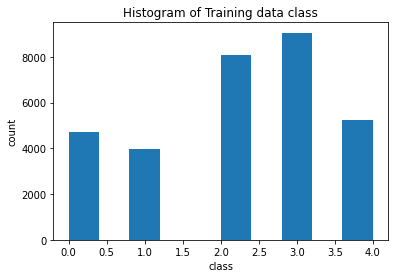

In [ ]:
#distribution of class labels
plt.hist(y_train.to_numpy().astype(int))
plt.xlabel("class")
plt.ylabel("count")
plt.title('Histogram of Training data class')
plt.show()

In [ ]:
#finding the right value of nearest neighbour

knn_cv = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn_cv, param_grid, cv=7)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#right best params and validation score
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

{'n_neighbors': 4}
0.9751555063877733


In [ ]:
#finding the right k-fold validation value
k_cross_val_accuracy = []
knn_cv = KNeighborsClassifier(n_neighbors=4)
for k in range(2, 10, 1):
    cv_scores = cross_val_score(knn_cv, X_train, y_train, cv = k)
    print("K : " + str(k) + "\ncross_validation_accurcy : " +  str(np.mean(cv_scores)) + "\n\n")
    k_cross_val_accuracy.append(np.mean(cv_scores))

K : 2
cross_validation_accurcy : 0.9711919610726241


K : 3
cross_validation_accurcy : 0.9739632398667721


K : 4
cross_validation_accurcy : 0.974510972147838


K : 5
cross_validation_accurcy : 0.9743176866055349


K : 6
cross_validation_accurcy : 0.9749943586354018


K : 7
cross_validation_accurcy : 0.9751555063877733


K : 8
cross_validation_accurcy : 0.9749942693009943


K : 9
cross_validation_accurcy : 0.9751553610967787




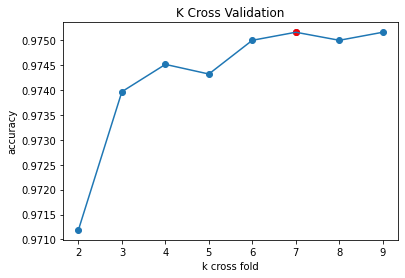

In [ ]:
k = [i for i in range(2,10,1)]
plt.scatter(k, k_cross_val_accuracy)
plt.scatter([7], [k_cross_val_accuracy[5]], color = 'red')
plt.plot(k, k_cross_val_accuracy)
plt.xlabel("k cross fold")
plt.ylabel("accuracy")
plt.title("K Cross Validation")
plt.show()


In [ ]:
# Apply KNN with n = 4 and on all 36 dimension

knn_cv_36 = KNeighborsClassifier(n_neighbors=4)
cv_scores = cross_val_score(knn_cv_36, X_train, y_train, cv = 7)
print(np.mean(cv_scores))

0.9751555063877733


In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
knn_cv_36 = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)

In [ ]:
# final answer metrics with accuracy, precision, recall, F1 score, roc_auc score

results_metrics = {'testing_accuracy': [],
                  'testing_precision': [],
                  'testing_recall': [],
                  'testing_F1_score': [],
                  'testing_roc_auc_score': [],
                   'dimension': [],
                  '% reduced': []}

In [ ]:
# Testing the KNN on 36 dimension
knn_cv_36 = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
y_pred2 = knn_cv_36.predict(X_test)
results_metrics['dimension'] = ['36']
results_metrics['testing_accuracy'] = [accuracy_score(y_test, y_pred2)]
#print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
results_metrics['testing_precision'] = [precision_score(y_test, y_pred2,average='micro')]
results_metrics['testing_recall'] = [recall_score(y_test, y_pred2,average='micro')]
results_metrics['testing_F1_score'] = [f1_score(y_test, y_pred2,average='micro')]
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
results_metrics['testing_roc_auc_score'] = [roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted')]
results_metrics['% reduced'] = [0]

In [ ]:
def round_off(val):
    ll = []
    for i in val:
        ll.append('%.4f'%(i))
    return ll

In [ ]:
def print_metric():
    for k in results_metrics.keys():
        if k != 'dimension':
            print(k)
            print(round_off(list(results_metrics[k])))
        else:
            print(k)
            print(results_metrics[k])
        print("\n")
    

In [ ]:
def delete_x_from_metric(n):
    for k in results_metrics.keys():
        results_metrics[k] = results_metrics[k][:-n]

In [ ]:
def EPS_value(trim_data):
    vor = Voronoi(trim_data)
    vor_points = vor.vertices
    hull = ConvexHull(trim_data)
    hull_points = trim_data[hull.vertices]
    ncol = trim_data.shape[1]
    vor_points = np.array(vor_points)
    hull_points = np.array(hull_points)
    
    inside_vor_vertices = []
    convex_hull_points = hull_points
    for ij in range(len(vor_points)): #len(vor_points)
        x = (np.append(trim_data, vor_points[ij]))
        x = np.array(np.reshape(np.array([x]), (-1, ncol)))
        new_convex_hull = ConvexHull(x)
        new_hull_points = np.array(x[new_convex_hull.vertices])
        old_hull_points = hull_points

        if np.array_equal(old_hull_points, new_hull_points):
            #print("point_inserted")
            inside_vor_vertices.append(vor_points[ij])
    inside_vor_vertices = np.array(inside_vor_vertices)
    rad_dist=(distance.cdist(inside_vor_vertices,trim_data,metric='euclidean'))
    radlist=[]
    for i in range(len(rad_dist)):
        radlist.append(min(rad_dist[i]))
    radlist = np.array(radlist)
    radlist.sort()
    print(radlist.shape)
    x = range(len(radlist))
    knc = KneeLocator(x, radlist, curve='convex', direction='increasing')
    epsilon = radlist[knc.knee]
    return epsilon
    #print("ECs :",knc.knee," ", epsilon)
    

In [ ]:
#delete_x_from_metric(1)

In [ ]:
print_metric()

testing_accuracy
['0.9765']


testing_precision
['0.9765']


testing_recall
['0.9765']


testing_F1_score
['0.9765']


testing_roc_auc_score
['0.9855']


dimension
['36']


% reduced
['0.0000']




# 7 dimension

In [ ]:
# normalizing data for the cluster finding

scaler = MinMaxScaler()
pca7 = PCA(n_components = 7)
data_scaled7 = scaler.fit_transform(X_train, y_train)
data_scaled7 = pd.DataFrame(pca7.fit_transform(data_scaled7))

In [ ]:
data_scaled7.shape

(31033, 7)

In [ ]:
knn_7 = KNeighborsClassifier(n_neighbors=4)
sfs7 = sfs(knn_7, k_features=7, forward=True, cv = 7)
sfs7 = sfs7.fit(X_train, y_train)
print(sfs7.k_feature_names_)

(1, 4, 5, 7, 9, 10, 12)


In [ ]:
knn_7 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 15)}
knn_gscv_7 = GridSearchCV(knn_7, param_grid, cv=7)
knn_gscv_7.fit(X_train[list(sfs7.k_feature_names_)], y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
#right best params and validation score
print(knn_gscv_7.best_params_)
print(knn_gscv_7.best_score_)

{'n_neighbors': 4}
0.9789578719038756


In [ ]:
knn_7.fit(X_train[list(sfs7.k_feature_names_)], y_train)
y_pred2 = knn_7.predict(X_test[list(sfs7.k_feature_names_)])


results_metrics['dimension'] = list(results_metrics['dimension']) + ["7 without algo"]
results_metrics['testing_accuracy'] = list(results_metrics['testing_accuracy']) + [accuracy_score(y_test, y_pred2)]
#print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
results_metrics['testing_precision'] = list(results_metrics['testing_precision']) + [precision_score(y_test, y_pred2,average='micro')]
results_metrics['testing_recall'] = list(results_metrics['testing_recall']) + [recall_score(y_test, y_pred2,average='micro')]
results_metrics['testing_F1_score'] = list(results_metrics['testing_F1_score']) + [f1_score(y_test, y_pred2,average='micro')]
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
results_metrics['testing_roc_auc_score'] = list(results_metrics['testing_roc_auc_score']) + [roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted')]
results_metrics['% reduced'] = list(results_metrics['% reduced']) + [0]


"""
print("Accuracy : ",accuracy_score(y_test, y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
print("Precision :",precision_score(y_test, y_pred2,average='micro'))
print("Recall :",recall_score(y_test, y_pred2,average='micro'))
print("F1 Score :",f1_score(y_test, y_pred2,average='micro'))
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
print("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))
print("\n\n")
"""

'\nprint("Accuracy : ",accuracy_score(y_test, y_pred2))\nprint("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))\nprint("Precision :",precision_score(y_test, y_pred2,average=\'micro\'))\nprint("Recall :",recall_score(y_test, y_pred2,average=\'micro\'))\nprint("F1 Score :",f1_score(y_test, y_pred2,average=\'micro\'))\nonehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))\nprint("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= \'ovr\', average=\'weighted\'))\nprint("\n\n")\n'

In [ ]:
print_metric()

testing_accuracy
['0.9765', '0.9765']


testing_precision
['0.9765', '0.9765']


testing_recall
['0.9765', '0.9765']


testing_F1_score
['0.9765', '0.9765']


testing_roc_auc_score
['0.9855', '0.9850']


dimension
['36', '7 without algo']


% reduced
['0.0000', '0.0000']




In [ ]:
#eps = EPS_value(data_scaled7)

In [ ]:
db_default7 = DBSCAN(eps = 0.11, min_samples = 7).fit(data_scaled7)
labels = db_default7.labels_
print(Counter(labels))

Counter({1: 3995, 3: 1927, -1: 1331, 29: 1033, 4: 902, 15: 625, 40: 564, 71: 485, 73: 383, 35: 380, 13: 375, 93: 354, 41: 343, 10: 302, 76: 293, 39: 264, 49: 251, 18: 240, 37: 237, 16: 236, 52: 233, 75: 224, 42: 211, 53: 209, 24: 202, 45: 191, 59: 188, 112: 179, 2: 177, 21: 160, 30: 160, 34: 158, 19: 156, 54: 152, 132: 146, 20: 144, 156: 143, 90: 141, 96: 141, 78: 140, 101: 140, 43: 139, 89: 139, 61: 137, 113: 137, 138: 137, 25: 136, 50: 136, 144: 135, 69: 134, 100: 134, 131: 132, 57: 131, 130: 131, 9: 129, 14: 129, 47: 129, 77: 129, 64: 128, 22: 127, 28: 127, 63: 127, 97: 127, 11: 126, 12: 126, 46: 126, 92: 126, 107: 126, 158: 125, 85: 124, 110: 124, 67: 123, 58: 121, 86: 121, 141: 121, 121: 120, 157: 120, 94: 119, 109: 119, 82: 118, 23: 117, 32: 117, 142: 117, 147: 117, 6: 116, 79: 115, 160: 115, 164: 115, 27: 114, 104: 113, 114: 113, 139: 113, 33: 112, 38: 112, 60: 112, 87: 112, 106: 112, 80: 111, 122: 111, 115: 111, 51: 110, 70: 110, 128: 109, 56: 108, 116: 107, 8: 106, 98: 106, 14

In [ ]:
clusters_list = np.array(db_default7.labels_)

testing_accuracy_score_on_7 = []
testing_precision_score_on_7 = []
testing_recall_score_on_7 = []
testing_F1_score_on_7 = []
testing_roc_auc_score_on_7 = []
number_of_data_point_after_reduction_7 = []
onehot_encoder = OneHotEncoder(sparse=False)

test_data_taken_7 = X_test[list(sfs7.k_feature_names_)]

for thresold in range(60, 100, 2):
    clusters = []
    y_train_clusters_data = []
    clusters_point_not_passing_thresold = []
    label_of_cluster_point_not_passing_thresold = []
    for cluster_number in range(np.max(np.unique(clusters_list))+1):
        #print(cluster_number)
        a = np.bincount((y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)]))
        b = (np.max(a) / np.sum(a))*100
        if (b > thresold):
            y_train_clusters_data.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
            points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
            points = pd.DataFrame(points)
            points = points[list(sfs7.k_feature_names_)]
            points = points.to_numpy()
            clusters.append(points)
        elif cluster_number != -1:
            label_of_cluster_point_not_passing_thresold.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
            points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
            points = pd.DataFrame(points)
            points = points[list(sfs7.k_feature_names_)]
            points = points.to_numpy()
            clusters_point_not_passing_thresold.append(points)
    clusters = np.array(clusters)
    y_train_clusters_data = np.array(y_train_clusters_data)
    clusters_hull = []
    labels_for_hull_points = []
    for i in range(clusters.shape[0]):
        if(clusters[i].shape[0] > 7):
            ind = ConvexHull(clusters[i])
            hull_points = clusters[i][ind.vertices]
            labels_for_hull_points.append(y_train_clusters_data[i][ind.vertices])
            clusters_hull.append(hull_points)
    clusters_hull = np.array(clusters_hull)
    labels_for_hull_points = np.array(labels_for_hull_points)
    X_modified_train_data_7 = clusters_hull[0]
    y_modified_train_data_7 = labels_for_hull_points[0]
    for i in range(clusters_hull.shape[0] - 1):
        X_modified_train_data_7 = np.vstack((X_modified_train_data_7, clusters_hull[i+1]))
        y_modified_train_data_7 = np.vstack((y_modified_train_data_7, labels_for_hull_points[i+1]))
    #X_modified_train_data.shape, y_modified_train_data.shape
    clusters_point_not_passing_thresold = np.array(clusters_point_not_passing_thresold)
    label_of_cluster_point_not_passing_thresold = np.array(label_of_cluster_point_not_passing_thresold)
    for i in range(clusters_point_not_passing_thresold.shape[0]):
        X_modified_train_data_7 = np.vstack((X_modified_train_data_7, clusters_point_not_passing_thresold[i]))
        y_modified_train_data_7 = np.vstack((y_modified_train_data_7, label_of_cluster_point_not_passing_thresold[i]))
        
    number_of_data_point_after_reduction_7.append(X_modified_train_data_7.shape[0])
    
    knn7_algo =  KNeighborsClassifier(n_neighbors=3, weights = 'distance').fit(X_modified_train_data_7, y_modified_train_data_7)
    
    y_pred2 = knn7_algo.predict(test_data_taken_7)
    
    
    testing_accuracy_score_on_7.append(accuracy_score(y_test, y_pred2))
    #print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
    testing_precision_score_on_7.append(precision_score(y_test, y_pred2,average='micro'))
    testing_recall_score_on_7.append(recall_score(y_test, y_pred2,average='micro'))
    testing_F1_score_on_7.append(f1_score(y_test, y_pred2,average='micro'))
    onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
    testing_roc_auc_score_on_7.append(roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))

    
            
            
        

In [ ]:
testing_accuracy_score_on_7 = np.array(testing_accuracy_score_on_7)
testing_precision_score_on_7 = np.array(testing_precision_score_on_7 )
testing_recall_score_on_7 = np.array(testing_recall_score_on_7 )
testing_F1_score_on_7 = np.array(testing_F1_score_on_7 )
number_of_data_point_after_reduction_7 = np.array(number_of_data_point_after_reduction_7)
testing_roc_auc_score_on_7  = np.array(testing_roc_auc_score_on_7)

np.save('testing_accuracy_score_on_7', testing_accuracy_score_on_7)
np.save('testing_precision_score_on_7', testing_precision_score_on_7)
np.save('testing_recall_score_on_7', testing_recall_score_on_7)
np.save('testing_F1_score_on_7', testing_F1_score_on_7)
np.save('number_of_data_point_after_reduction_7', number_of_data_point_after_reduction_7)
np.save('testing_roc_auc_scor7', testing_roc_auc_score_on_7)

In [ ]:
thresold = [i for i in range(60, 99, 2)]
Initial_data = [X_train.shape[0] for i in range(60, 99, 2)]
d = {'thresold': thresold,
    'Initial_data_size': Initial_data}
final_results_7 = pd.DataFrame(d)
final_results_7['Reduce_data_size'] = number_of_data_point_after_reduction_7
final_results_7['testing_accuracy_score'] = testing_accuracy_score_on_7
final_results_7['testing_precision_score'] = testing_precision_score_on_7
final_results_7['testing_recall_score'] = testing_recall_score_on_7
final_results_7['testing_F1_score'] = testing_F1_score_on_7
final_results_7['testing_roc_auc_scor7'] = testing_roc_auc_score_on_7
final_results_7['percent_reduced'] = (((final_results_7['Initial_data_size'] - final_results_7['Reduce_data_size']) /  final_results_7['Initial_data_size'])* 100 )
final_results_7.to_csv('final_results_7.csv')

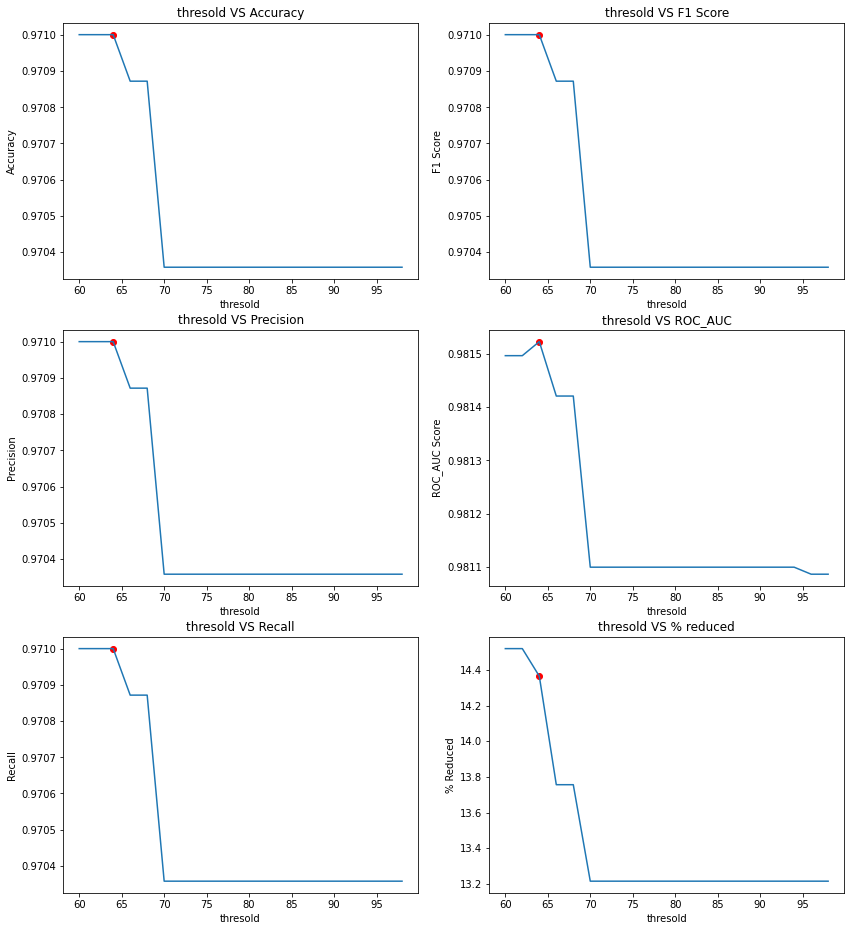

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(14,16))
axs[0, 0].plot(final_results_7['thresold'], final_results_7['testing_accuracy_score'])
axs[0, 0].scatter(final_results_7['thresold'][2], final_results_7['testing_accuracy_score'][2], color = 'red')
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].set_xlabel("thresold")
axs[0, 0].set_title("thresold VS Accuracy")
axs[1, 0].plot(final_results_7['thresold'], final_results_7['testing_precision_score'])
axs[1, 0].scatter(final_results_7['thresold'][2], final_results_7['testing_precision_score'][2], color = 'red')
axs[1, 0].set_title("thresold VS Precision")
axs[2, 0].plot(final_results_7['thresold'], final_results_7['testing_recall_score'])
axs[2, 0].scatter(final_results_7['thresold'][2], final_results_7['testing_recall_score'][2], color = 'red')
axs[2, 0].set_title("thresold VS Recall")
axs[0, 1].plot(final_results_7['thresold'], final_results_7['testing_F1_score'])
axs[0, 1].scatter(final_results_7['thresold'][2], final_results_7['testing_F1_score'][2], color = 'red')
axs[0, 1].set_title("thresold VS F1 Score")
axs[1, 1].plot(final_results_7['thresold'], final_results_7['testing_roc_auc_scor7'])
axs[1, 1].scatter(final_results_7['thresold'][2], final_results_7['testing_roc_auc_scor7'][2], color = 'red')
axs[1, 1].set_title("thresold VS ROC_AUC")
axs[2, 1].scatter(final_results_7['thresold'][2], final_results_7['percent_reduced'][2], color = 'red')
axs[2, 1].plot(final_results_7['thresold'], final_results_7['percent_reduced'])
axs[2, 1].set_title("thresold VS % reduced")

axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].set_xlabel("thresold")
axs[1, 0].set_ylabel("Precision")
axs[1, 0].set_xlabel("thresold")
axs[2, 0].set_ylabel("Recall")
axs[2, 0].set_xlabel("thresold")
axs[0, 1].set_ylabel("F1 Score")
axs[0, 1].set_xlabel("thresold")
axs[1, 1].set_ylabel("ROC_AUC Score")
axs[1, 1].set_xlabel("thresold")
axs[2, 1].set_ylabel("% Reduced")
axs[2, 1].set_xlabel("thresold")

fig.savefig("7 dim thresold.jpg")

In [ ]:
final_results_7

,thresold,Initial_data_size,Reduce_data_size,testing_accuracy_score,testing_precision_score,testing_recall_score,testing_F1_score,testing_roc_auc_scor7,percent_reduced
0,60,31033,26527,0.971001,0.971001,0.971001,0.971001,0.981497,14.520027
1,62,31033,26527,0.971001,0.971001,0.971001,0.971001,0.981497,14.520027
2,64,31033,26575,0.971001,0.971001,0.971001,0.971001,0.981524,14.365353
3,66,31033,26764,0.970873,0.970873,0.970873,0.970873,0.981421,13.756324
4,68,31033,26764,0.970873,0.970873,0.970873,0.970873,0.981421,13.756324
5,70,31033,26932,0.970357,0.970357,0.970357,0.970357,0.981099,13.214965
6,72,31033,26932,0.970357,0.970357,0.970357,0.970357,0.981099,13.214965
7,74,31033,26932,0.970357,0.970357,0.970357,0.970357,0.981099,13.214965
8,76,31033,26932,0.970357,0.970357,0.970357,0.970357,0.981099,13.214965
9,78,31033,26932,0.970357,0.970357,0.970357,0.970357,0.981099,13.214965


In [ ]:
clusters = []
y_train_clusters_data = []
clusters_point_not_passing_thresold = []
label_of_cluster_point_not_passing_thresold = []
for cluster_number in range(np.max(np.unique(clusters_list))+1):
    #print(cluster_number)
    a = np.bincount((y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)]))
    b = (np.max(a) / np.sum(a))*100
    if (b > 64):
        y_train_clusters_data.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
        points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
        points = pd.DataFrame(points)
        points = points[list(sfs7.k_feature_names_)]
        points = points.to_numpy()
        clusters.append(points)
    elif cluster_number != -1:
        label_of_cluster_point_not_passing_thresold.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
        points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
        points = pd.DataFrame(points)
        points = points[list(sfs7.k_feature_names_)]
        points = points.to_numpy()
        clusters_point_not_passing_thresold.append(points)
clusters = np.array(clusters)
y_train_clusters_data = np.array(y_train_clusters_data)
clusters_hull = []
labels_for_hull_points = []
for i in range(clusters.shape[0]):
    if(clusters[i].shape[0] > 7):
        ind = ConvexHull(clusters[i])
        hull_points = clusters[i][ind.vertices]
        labels_for_hull_points.append(y_train_clusters_data[i][ind.vertices])
        clusters_hull.append(hull_points)
clusters_hull = np.array(clusters_hull)
labels_for_hull_points = np.array(labels_for_hull_points)
X_modified_train_data_7 = clusters_hull[0]
y_modified_train_data_7 = labels_for_hull_points[0]
for i in range(clusters_hull.shape[0] - 1):
    X_modified_train_data_7 = np.vstack((X_modified_train_data_7, clusters_hull[i+1]))
    y_modified_train_data_7 = np.vstack((y_modified_train_data_7, labels_for_hull_points[i+1]))
#X_modified_train_data.shape, y_modified_train_data.shape
clusters_point_not_passing_thresold = np.array(clusters_point_not_passing_thresold)
label_of_cluster_point_not_passing_thresold = np.array(label_of_cluster_point_not_passing_thresold)
for i in range(clusters_point_not_passing_thresold.shape[0]):
    X_modified_train_data_7 = np.vstack((X_modified_train_data_7, clusters_point_not_passing_thresold[i]))
    y_modified_train_data_7 = np.vstack((y_modified_train_data_7, label_of_cluster_point_not_passing_thresold[i]))

In [ ]:
knn_7_algo = KNeighborsClassifier(n_neighbors=4)
knn_7_algo.fit(X_modified_train_data_7, y_modified_train_data_7)
y_pred2 = knn_7_algo.predict(X_test[list(sfs7.k_feature_names_)])


results_metrics['dimension'] = list(results_metrics['dimension']) + ["7 with algo"]
results_metrics['testing_accuracy'] = list(results_metrics['testing_accuracy']) + [accuracy_score(y_test, y_pred2)]
#print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
results_metrics['testing_precision'] = list(results_metrics['testing_precision']) + [precision_score(y_test, y_pred2,average='micro')]
results_metrics['testing_recall'] = list(results_metrics['testing_recall']) + [recall_score(y_test, y_pred2,average='micro')]
results_metrics['testing_F1_score'] = list(results_metrics['testing_F1_score']) + [f1_score(y_test, y_pred2,average='micro')]
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
results_metrics['testing_roc_auc_score'] = list(results_metrics['testing_roc_auc_score']) + [roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted')]
results_metrics['% reduced'] = list(results_metrics['% reduced']) + [final_results_7['percent_reduced'][2]]


"""
print("Accuracy : ",accuracy_score(y_test, y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
print("Precision :",precision_score(y_test, y_pred2,average='micro'))
print("Recall :",recall_score(y_test, y_pred2,average='micro'))
print("F1 Score :",f1_score(y_test, y_pred2,average='micro'))
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
print("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))
print("\n\n")
"""


'\nprint("Accuracy : ",accuracy_score(y_test, y_pred2))\nprint("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))\nprint("Precision :",precision_score(y_test, y_pred2,average=\'micro\'))\nprint("Recall :",recall_score(y_test, y_pred2,average=\'micro\'))\nprint("F1 Score :",f1_score(y_test, y_pred2,average=\'micro\'))\nonehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))\nprint("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= \'ovr\', average=\'weighted\'))\nprint("\n\n")\n'

In [ ]:
print_metric()

testing_accuracy
['0.9765', '0.9765', '0.9741']


testing_precision
['0.9765', '0.9765', '0.9741']


testing_recall
['0.9765', '0.9765', '0.9741']


testing_F1_score
['0.9765', '0.9765', '0.9741']


testing_roc_auc_score
['0.9855', '0.9850', '0.9837']


dimension
['36', '7 without algo', '7 with algo']


% reduced
['0.0000', '0.0000', '14.3654']




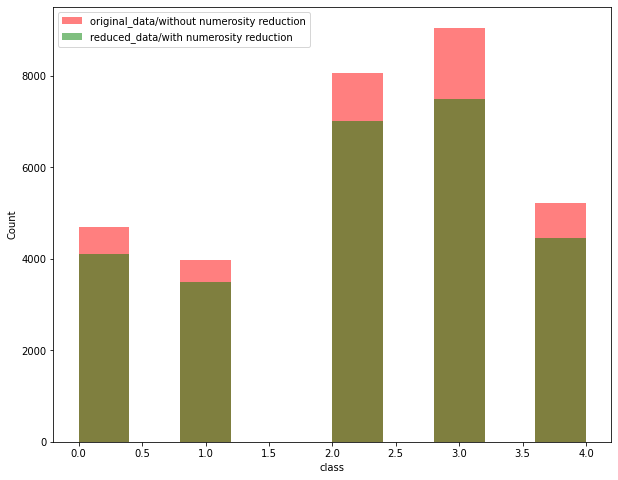

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(y_train, alpha = 0.5, color='r', label='original_data/without numerosity reduction')
plt.hist(y_modified_train_data_7, alpha = 0.5, color='g', label='reduced_data/with numerosity reduction')
plt.xlabel("class")
plt.ylabel("Count")
plt.legend(loc='upper left')
plt.show()

# 6 Dimension

In [ ]:
# normalizing data for the cluster finding
scaler = MinMaxScaler()
pca6= PCA(n_components = 6)
data_scaled6= scaler.fit_transform(X_train, y_train)
data_scaled6= pd.DataFrame(pca6.fit_transform(data_scaled6))

In [ ]:
data_scaled6.shape

(31033, 6)

In [ ]:
knn_6 = KNeighborsClassifier(n_neighbors=3)
sfs6 = sfs(knn_6, k_features=6, forward=True, cv = 7)
sfs6 = sfs6.fit(X_train, y_train)
print(sfs6.k_feature_names_)

(4, 5, 7, 9, 10, 12)


In [ ]:
#finding the right value of nearest neighbour
knn_6 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 15)}
knn_gscv_6 = GridSearchCV(knn_6, param_grid, cv=7)
knn_gscv_6.fit(X_train[list(sfs6.k_feature_names_)], y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
#right best params and validation score
print(knn_gscv_6.best_params_)
print(knn_gscv_6.best_score_)

{'n_neighbors': 4}
0.9760577063165565


In [ ]:
knn_6.fit(X_train[list(sfs6.k_feature_names_)], y_train)
y_pred2 = knn_6.predict(X_test[list(sfs6.k_feature_names_)])


results_metrics['dimension'] = list(results_metrics['dimension']) + ["6 without algo"]
results_metrics['testing_accuracy'] = list(results_metrics['testing_accuracy']) + [accuracy_score(y_test, y_pred2)]
#print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
results_metrics['testing_precision'] = list(results_metrics['testing_precision']) + [precision_score(y_test, y_pred2,average='micro')]
results_metrics['testing_recall'] = list(results_metrics['testing_recall']) + [recall_score(y_test, y_pred2,average='micro')]
results_metrics['testing_F1_score'] = list(results_metrics['testing_F1_score']) + [f1_score(y_test, y_pred2,average='micro')]
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
results_metrics['testing_roc_auc_score'] = list(results_metrics['testing_roc_auc_score']) + [roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted')]
results_metrics['% reduced'] = list(results_metrics['% reduced']) + [0]


"""
print("Accuracy : ",accuracy_score(y_test, y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
print("Precision :",precision_score(y_test, y_pred2,average='micro'))
print("Recall :",recall_score(y_test, y_pred2,average='micro'))
print("F1 Score :",f1_score(y_test, y_pred2,average='micro'))
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
print("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))
print("\n\n")
"""

'\nprint("Accuracy : ",accuracy_score(y_test, y_pred2))\nprint("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))\nprint("Precision :",precision_score(y_test, y_pred2,average=\'micro\'))\nprint("Recall :",recall_score(y_test, y_pred2,average=\'micro\'))\nprint("F1 Score :",f1_score(y_test, y_pred2,average=\'micro\'))\nonehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))\nprint("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= \'ovr\', average=\'weighted\'))\nprint("\n\n")\n'

In [ ]:
print_metric()

testing_accuracy
['0.9765', '0.9765', '0.9741', '0.9745']


testing_precision
['0.9765', '0.9765', '0.9741', '0.9745']


testing_recall
['0.9765', '0.9765', '0.9741', '0.9745']


testing_F1_score
['0.9765', '0.9765', '0.9741', '0.9745']


testing_roc_auc_score
['0.9855', '0.9850', '0.9837', '0.9837']


dimension
['36', '7 without algo', '7 with algo', '6 without algo']


% reduced
['0.0000', '0.0000', '14.3654', '0.0000']




In [ ]:
#eps = EPS_value(data_scaled6)

In [ ]:
db_default6 = DBSCAN(eps = 0.088, min_samples = 6).fit(data_scaled6)
labels = db_default6.labels_
print(Counter(labels))

Counter({1: 4022, 4: 2688, -1: 1868, 27: 1039, 15: 1027, 31: 685, 32: 540, 37: 467, 5: 446, 33: 378, 38: 344, 11: 302, 14: 268, 42: 258, 36: 256, 48: 247, 85: 245, 18: 240, 81: 228, 64: 223, 16: 219, 39: 210, 49: 208, 2: 200, 65: 188, 6: 187, 53: 180, 102: 179, 3: 176, 89: 171, 21: 161, 19: 156, 125: 149, 20: 144, 123: 142, 80: 141, 92: 140, 67: 139, 25: 138, 145: 138, 55: 137, 46: 136, 79: 136, 134: 135, 91: 134, 103: 134, 62: 133, 131: 133, 97: 132, 121: 131, 122: 131, 10: 128, 22: 127, 41: 126, 58: 126, 66: 126, 12: 125, 13: 125, 26: 125, 84: 124, 124: 122, 100: 122, 71: 121, 75: 121, 132: 121, 153: 121, 52: 120, 76: 120, 146: 120, 99: 119, 113: 119, 70: 118, 86: 118, 83: 117, 7: 116, 29: 115, 110: 115, 150: 115, 156: 115, 35: 112, 30: 111, 94: 111, 106: 111, 34: 110, 47: 110, 54: 110, 63: 110, 68: 110, 129: 109, 115: 108, 96: 108, 119: 108, 107: 107, 23: 106, 60: 106, 105: 106, 114: 105, 24: 104, 137: 104, 9: 103, 40: 103, 101: 103, 104: 102, 50: 102, 0: 101, 57: 101, 98: 101, 8: 1

In [ ]:
clusters_list = np.array(db_default6.labels_)

testing_accuracy_score_on_6 = []
testing_precision_score_on_6 = []
testing_recall_score_on_6 = []
testing_F1_score_on_6 = []
testing_roc_auc_score_on_6 = []
number_of_data_point_after_reduction_6 = []
onehot_encoder = OneHotEncoder(sparse=False)

test_data_taken_6 = X_test[list(sfs6.k_feature_names_)]

for thresold in range(60, 100, 2):
    clusters = []
    y_train_clusters_data = []
    clusters_point_not_passing_thresold = []
    label_of_cluster_point_not_passing_thresold = []
    for cluster_number in range(np.max(np.unique(clusters_list))+1):
        #print(cluster_number)
        a = np.bincount((y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)]))
        b = (np.max(a) / np.sum(a))*100
        if (b > thresold):
            y_train_clusters_data.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
            points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
            points = pd.DataFrame(points)
            points = points[list(sfs6.k_feature_names_)]
            points = points.to_numpy()
            clusters.append(points)
        elif cluster_number != -1:
            label_of_cluster_point_not_passing_thresold.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
            points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
            points = pd.DataFrame(points)
            points = points[list(sfs6.k_feature_names_)]
            points = points.to_numpy()
            clusters_point_not_passing_thresold.append(points)
    clusters = np.array(clusters)
    y_train_clusters_data = np.array(y_train_clusters_data)
    clusters_hull = []
    labels_for_hull_points = []
    for i in range(clusters.shape[0]):
        if(clusters[i].shape[0] > 6):
            ind = ConvexHull(clusters[i])
            hull_points = clusters[i][ind.vertices]
            labels_for_hull_points.append(y_train_clusters_data[i][ind.vertices])
            clusters_hull.append(hull_points)
    clusters_hull = np.array(clusters_hull)
    labels_for_hull_points = np.array(labels_for_hull_points)
    X_modified_train_data_6 = clusters_hull[0]
    y_modified_train_data_6 = labels_for_hull_points[0]
    for i in range(clusters_hull.shape[0] - 1):
        X_modified_train_data_6 = np.vstack((X_modified_train_data_6, clusters_hull[i+1]))
        y_modified_train_data_6 = np.vstack((y_modified_train_data_6, labels_for_hull_points[i+1]))
    #X_modified_train_data.shape, y_modified_train_data.shape
    clusters_point_not_passing_thresold = np.array(clusters_point_not_passing_thresold)
    label_of_cluster_point_not_passing_thresold = np.array(label_of_cluster_point_not_passing_thresold)
    for i in range(clusters_point_not_passing_thresold.shape[0]):
        X_modified_train_data_6 = np.vstack((X_modified_train_data_6, clusters_point_not_passing_thresold[i]))
        y_modified_train_data_6 = np.vstack((y_modified_train_data_6, label_of_cluster_point_not_passing_thresold[i]))
        
    number_of_data_point_after_reduction_6.append(X_modified_train_data_6.shape[0])
    
    knn6_algo =  KNeighborsClassifier(n_neighbors=3, weights = 'distance').fit(X_modified_train_data_6, y_modified_train_data_6)
    
    y_pred2 = knn6_algo.predict(test_data_taken_6)
    
    
    testing_accuracy_score_on_6.append(accuracy_score(y_test, y_pred2))
    #print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
    testing_precision_score_on_6.append(precision_score(y_test, y_pred2,average='micro'))
    testing_recall_score_on_6.append(recall_score(y_test, y_pred2,average='micro'))
    testing_F1_score_on_6.append(f1_score(y_test, y_pred2,average='micro'))
    onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
    testing_roc_auc_score_on_6.append(roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))

    
            
            
        

In [ ]:
testing_accuracy_score_on_6 = np.array(testing_accuracy_score_on_6)
testing_precision_score_on_6 = np.array(testing_precision_score_on_6 )
testing_recall_score_on_6 = np.array(testing_recall_score_on_6 )
testing_F1_score_on_6 = np.array(testing_F1_score_on_6 )
number_of_data_point_after_reduction_6 = np.array(number_of_data_point_after_reduction_6)
testing_roc_auc_score_on_6  = np.array(testing_roc_auc_score_on_6)

np.save('testing_accuracy_score_on_6', testing_accuracy_score_on_6)
np.save('testing_precision_score_on_6', testing_precision_score_on_6)
np.save('testing_recall_score_on_6', testing_recall_score_on_6)
np.save('testing_F1_score_on_6', testing_F1_score_on_6)
np.save('number_of_data_point_after_reduction_6', number_of_data_point_after_reduction_6)
np.save('testing_roc_auc_scor6', testing_roc_auc_score_on_6)

In [ ]:
thresold = [i for i in range(60, 99, 2)]
Initial_data = [X_train.shape[0] for i in range(60, 99, 2)]
d = {'thresold': thresold,
    'Initial_data_size': Initial_data}
final_results_6 = pd.DataFrame(d)
final_results_6['Reduce_data_size'] = number_of_data_point_after_reduction_6
final_results_6['testing_accuracy_score'] = testing_accuracy_score_on_6
final_results_6['testing_precision_score'] = testing_precision_score_on_6
final_results_6['testing_recall_score'] = testing_recall_score_on_6
final_results_6['testing_F1_score'] = testing_F1_score_on_6
final_results_6['testing_roc_auc_score'] = testing_roc_auc_score_on_6
final_results_6['percent_reduced'] = (((final_results_6['Initial_data_size'] - final_results_6['Reduce_data_size']) /  final_results_6['Initial_data_size'])* 100 )
final_results_6.to_csv('final_results_6.csv')

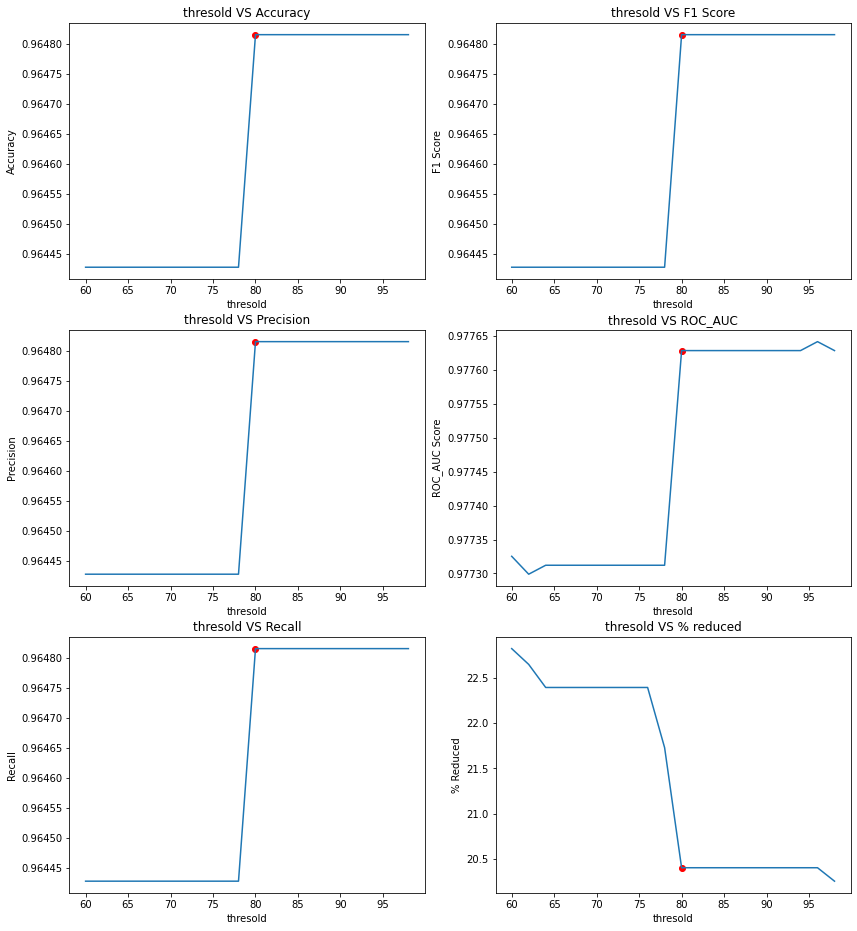

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(14,16))
axs[0, 0].plot(final_results_6['thresold'], final_results_6['testing_accuracy_score'])
axs[0, 0].set_title("thresold VS Accuracy")
axs[1, 0].plot(final_results_6['thresold'], final_results_6['testing_precision_score'])
axs[1, 0].set_title("thresold VS Precision")
axs[2, 0].plot(final_results_6['thresold'], final_results_6['testing_recall_score'])
axs[2, 0].set_title("thresold VS Recall")
axs[0, 1].plot(final_results_6['thresold'], final_results_6['testing_F1_score'])
axs[0, 1].set_title("thresold VS F1 Score")
axs[1, 1].plot(final_results_6['thresold'], final_results_6['testing_roc_auc_score'])
axs[1, 1].set_title("thresold VS ROC_AUC")
axs[2, 1].plot(final_results_6['thresold'], final_results_6['percent_reduced'])
axs[2, 1].set_title("thresold VS % reduced")


axs[0, 0].scatter(final_results_6['thresold'][10], final_results_6['testing_accuracy_score'][10], color = 'red')
axs[1, 0].scatter(final_results_6['thresold'][10], final_results_6['testing_precision_score'][10], color = 'red')
axs[2, 0].scatter(final_results_6['thresold'][10], final_results_6['testing_recall_score'][10], color = 'red')
axs[0, 1].scatter(final_results_6['thresold'][10], final_results_6['testing_F1_score'][10], color = 'red')
axs[1, 1].scatter(final_results_6['thresold'][10], final_results_6['testing_roc_auc_score'][10], color = 'red')
axs[2, 1].scatter(final_results_6['thresold'][10], final_results_6['percent_reduced'][10], color = 'red')


axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].set_xlabel("thresold")
axs[1, 0].set_ylabel("Precision")
axs[1, 0].set_xlabel("thresold")
axs[2, 0].set_ylabel("Recall")
axs[2, 0].set_xlabel("thresold")
axs[0, 1].set_ylabel("F1 Score")
axs[0, 1].set_xlabel("thresold")
axs[1, 1].set_ylabel("ROC_AUC Score")
axs[1, 1].set_xlabel("thresold")
axs[2, 1].set_ylabel("% Reduced")
axs[2, 1].set_xlabel("thresold")
fig.savefig("thresold 6.jpg")

In [ ]:
final_results_6

,thresold,Initial_data_size,Reduce_data_size,testing_accuracy_score,testing_precision_score,testing_recall_score,testing_F1_score,testing_roc_auc_score,percent_reduced
0,60,31033,23951,0.964428,0.964428,0.964428,0.964428,0.977325,22.820868
1,62,31033,24005,0.964428,0.964428,0.964428,0.964428,0.977299,22.646860
2,64,31033,24084,0.964428,0.964428,0.964428,0.964428,0.977312,22.392292
3,66,31033,24084,0.964428,0.964428,0.964428,0.964428,0.977312,22.392292
4,68,31033,24084,0.964428,0.964428,0.964428,0.964428,0.977312,22.392292
5,70,31033,24084,0.964428,0.964428,0.964428,0.964428,0.977312,22.392292
6,72,31033,24084,0.964428,0.964428,0.964428,0.964428,0.977312,22.392292
7,74,31033,24084,0.964428,0.964428,0.964428,0.964428,0.977312,22.392292
8,76,31033,24084,0.964428,0.964428,0.964428,0.964428,0.977312,22.392292
9,78,31033,24290,0.964428,0.964428,0.964428,0.964428,0.977312,21.728483


In [ ]:
clusters = []
y_train_clusters_data = []
clusters_point_not_passing_thresold = []
label_of_cluster_point_not_passing_thresold = []
for cluster_number in range(np.max(np.unique(clusters_list))+1):
    #print(cluster_number)
    a = np.bincount((y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)]))
    b = (np.max(a) / np.sum(a))*100
    if (b > 80):
        y_train_clusters_data.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
        points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
        points = pd.DataFrame(points)
        points = points[list(sfs6.k_feature_names_)]
        points = points.to_numpy()
        clusters.append(points)
    elif cluster_number != -1:
        label_of_cluster_point_not_passing_thresold.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
        points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
        points = pd.DataFrame(points)
        points = points[list(sfs6.k_feature_names_)]
        points = points.to_numpy()
        clusters_point_not_passing_thresold.append(points)
clusters = np.array(clusters)
y_train_clusters_data = np.array(y_train_clusters_data)
clusters_hull = []
labels_for_hull_points = []
for i in range(clusters.shape[0]):
    if(clusters[i].shape[0] > 6):
        ind = ConvexHull(clusters[i])
        hull_points = clusters[i][ind.vertices]
        labels_for_hull_points.append(y_train_clusters_data[i][ind.vertices])
        clusters_hull.append(hull_points)
clusters_hull = np.array(clusters_hull)
labels_for_hull_points = np.array(labels_for_hull_points)
X_modified_train_data_6 = clusters_hull[0]
y_modified_train_data_6 = labels_for_hull_points[0]
for i in range(clusters_hull.shape[0] - 1):
    X_modified_train_data_6 = np.vstack((X_modified_train_data_6, clusters_hull[i+1]))
    y_modified_train_data_6 = np.vstack((y_modified_train_data_6, labels_for_hull_points[i+1]))
#X_modified_train_data.shape, y_modified_train_data.shape
clusters_point_not_passing_thresold = np.array(clusters_point_not_passing_thresold)
label_of_cluster_point_not_passing_thresold = np.array(label_of_cluster_point_not_passing_thresold)
for i in range(clusters_point_not_passing_thresold.shape[0]):
    X_modified_train_data_6 = np.vstack((X_modified_train_data_6, clusters_point_not_passing_thresold[i]))
    y_modified_train_data_6 = np.vstack((y_modified_train_data_6, label_of_cluster_point_not_passing_thresold[i]))

In [ ]:
knn_6_algo = KNeighborsClassifier(n_neighbors=4)
knn_6_algo.fit(X_modified_train_data_6, y_modified_train_data_6)
y_pred2 = knn_6_algo.predict(X_test[list(sfs6.k_feature_names_)])


results_metrics['dimension'] = list(results_metrics['dimension']) + ["6 with algo"]
results_metrics['testing_accuracy'] = list(results_metrics['testing_accuracy']) + [accuracy_score(y_test, y_pred2)]
#print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
results_metrics['testing_precision'] = list(results_metrics['testing_precision']) + [precision_score(y_test, y_pred2,average='micro')]
results_metrics['testing_recall'] = list(results_metrics['testing_recall']) + [recall_score(y_test, y_pred2,average='micro')]
results_metrics['testing_F1_score'] = list(results_metrics['testing_F1_score']) + [f1_score(y_test, y_pred2,average='micro')]
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
results_metrics['testing_roc_auc_score'] = list(results_metrics['testing_roc_auc_score']) + [roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted')]
results_metrics['% reduced'] = list(results_metrics['% reduced']) + [final_results_6['percent_reduced'][10]]


"""
print("Accuracy : ",accuracy_score(y_test, y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
print("Precision :",precision_score(y_test, y_pred2,average='micro'))
print("Recall :",recall_score(y_test, y_pred2,average='micro'))
print("F1 Score :",f1_score(y_test, y_pred2,average='micro'))
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
print("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))
print("\n\n")
"""


'\nprint("Accuracy : ",accuracy_score(y_test, y_pred2))\nprint("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))\nprint("Precision :",precision_score(y_test, y_pred2,average=\'micro\'))\nprint("Recall :",recall_score(y_test, y_pred2,average=\'micro\'))\nprint("F1 Score :",f1_score(y_test, y_pred2,average=\'micro\'))\nonehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))\nprint("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= \'ovr\', average=\'weighted\'))\nprint("\n\n")\n'

In [ ]:
print_metric()

testing_accuracy
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666']


testing_precision
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666']


testing_recall
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666']


testing_F1_score
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666']


testing_roc_auc_score
['0.9855', '0.9850', '0.9837', '0.9837', '0.9790']


dimension
['36', '7 without algo', '7 with algo', '6 without algo', '6 with algo']


% reduced
['0.0000', '0.0000', '14.3654', '0.0000', '20.4041']




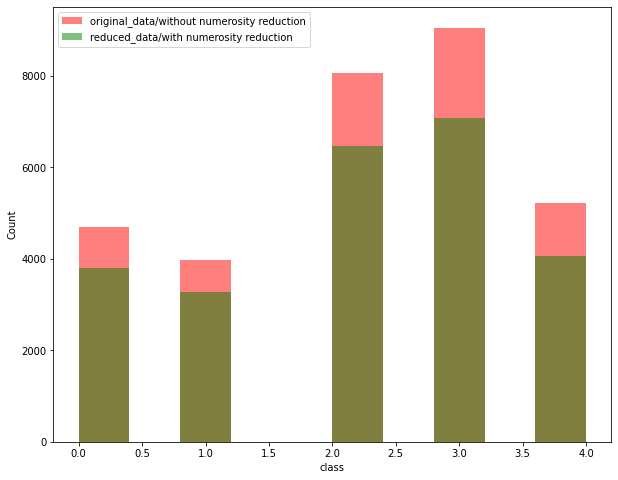

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(y_train, alpha = 0.5, color='r', label='original_data/without numerosity reduction')
plt.hist(y_modified_train_data_6, alpha = 0.5, color='g', label='reduced_data/with numerosity reduction')
plt.xlabel("class")
plt.ylabel("Count")
plt.legend(loc='upper left')
plt.show()

# 5 Dimension

In [ ]:
# normalizing data for the cluster finding
scaler = MinMaxScaler()
pca5 = PCA(n_components = 5)
data_scaled5 = scaler.fit_transform(X_train, y_train)
data_scaled5 = pd.DataFrame(pca5.fit_transform(data_scaled5))

In [ ]:
data_scaled5.shape

(31033, 5)

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=3)
sfs5 = sfs(knn_5, k_features=5, forward=True, cv = 7)
sfs5 = sfs5.fit(X_train, y_train)
print(sfs5.k_feature_names_)

(4, 5, 7, 9, 12)


In [ ]:
#finding the right value of nearest neighbour
knn_5 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 15)}
knn_gscv_5 = GridSearchCV(knn_5, param_grid, cv=7)
knn_gscv_5.fit(X_train[list(sfs5.k_feature_names_)], y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
#right best params and validation score
print(knn_gscv_5.best_params_)
print(knn_gscv_5.best_score_)

{'n_neighbors': 1}
0.9687750955811544


In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=3)
knn_5.fit(X_train[list(sfs5.k_feature_names_)], y_train)
y_pred2 = knn_5.predict(X_test[list(sfs5.k_feature_names_)])


results_metrics['dimension'] = list(results_metrics['dimension']) + ["5 without algo"]
results_metrics['testing_accuracy'] = list(results_metrics['testing_accuracy']) + [accuracy_score(y_test, y_pred2)]
#print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
results_metrics['testing_precision'] = list(results_metrics['testing_precision']) + [precision_score(y_test, y_pred2,average='micro')]
results_metrics['testing_recall'] = list(results_metrics['testing_recall']) + [recall_score(y_test, y_pred2,average='micro')]
results_metrics['testing_F1_score'] = list(results_metrics['testing_F1_score']) + [f1_score(y_test, y_pred2,average='micro')]
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
results_metrics['testing_roc_auc_score'] = list(results_metrics['testing_roc_auc_score']) + [roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted')]
results_metrics['% reduced'] = list(results_metrics['% reduced']) + [0]


"""
print("Accuracy : ",accuracy_score(y_test, y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
print("Precision :",precision_score(y_test, y_pred2,average='micro'))
print("Recall :",recall_score(y_test, y_pred2,average='micro'))
print("F1 Score :",f1_score(y_test, y_pred2,average='micro'))
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
print("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))
print("\n\n")
"""

'\nprint("Accuracy : ",accuracy_score(y_test, y_pred2))\nprint("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))\nprint("Precision :",precision_score(y_test, y_pred2,average=\'micro\'))\nprint("Recall :",recall_score(y_test, y_pred2,average=\'micro\'))\nprint("F1 Score :",f1_score(y_test, y_pred2,average=\'micro\'))\nonehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))\nprint("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= \'ovr\', average=\'weighted\'))\nprint("\n\n")\n'

In [ ]:
print_metric()

testing_accuracy
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682']


testing_precision
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682']


testing_recall
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682']


testing_F1_score
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682']


testing_roc_auc_score
['0.9855', '0.9850', '0.9837', '0.9837', '0.9790', '0.9797']


dimension
['36', '7 without algo', '7 with algo', '6 without algo', '6 with algo', '5 without algo']


% reduced
['0.0000', '0.0000', '14.3654', '0.0000', '20.4041', '0.0000']




In [ ]:
#eps = EPS_value(data_scaled5)

In [ ]:
db_default5 = DBSCAN(eps = 0.062, min_samples = 5).fit(data_scaled5)
labels = db_default5.labels_
print(Counter(labels))

Counter({1: 3640, 0: 3573, -1: 3289, 4: 1197, 21: 792, 26: 482, 24: 456, 67: 378, 56: 370, 32: 362, 23: 311, 31: 310, 29: 308, 9: 298, 15: 294, 38: 291, 11: 262, 80: 247, 28: 245, 36: 244, 12: 229, 73: 226, 105: 221, 63: 217, 48: 207, 2: 200, 30: 200, 37: 197, 34: 194, 91: 173, 3: 161, 16: 159, 25: 158, 76: 157, 13: 153, 45: 147, 108: 146, 14: 141, 72: 141, 110: 140, 119: 138, 46: 137, 58: 134, 78: 134, 81: 133, 53: 132, 83: 131, 42: 131, 109: 131, 19: 130, 86: 130, 123: 130, 33: 128, 17: 127, 71: 124, 10: 122, 20: 122, 120: 121, 49: 119, 68: 119, 111: 119, 88: 117, 57: 116, 62: 116, 92: 116, 6: 115, 154: 114, 22: 112, 27: 112, 112: 112, 132: 112, 138: 111, 35: 110, 44: 109, 117: 109, 55: 108, 99: 106, 43: 105, 59: 105, 95: 105, 104: 104, 74: 104, 126: 104, 64: 103, 18: 102, 39: 102, 60: 100, 107: 100, 127: 100, 7: 99, 75: 98, 82: 98, 103: 96, 97: 94, 124: 94, 40: 93, 94: 93, 89: 91, 98: 91, 54: 90, 61: 90, 100: 90, 149: 90, 106: 89, 66: 87, 70: 87, 84: 87, 141: 87, 69: 86, 8: 84, 87: 

In [ ]:
clusters_list = np.array(db_default5.labels_)

testing_accuracy_score_on_5 = []
testing_precision_score_on_5 = []
testing_recall_score_on_5 = []
testing_F1_score_on_5 = []
testing_roc_auc_score_on_5 = []
number_of_data_point_after_reduction_5 = []
onehot_encoder = OneHotEncoder(sparse=False)

test_data_taken_5 = X_test[list(sfs5.k_feature_names_)]

for thresold in range(60, 100, 2):
    clusters = []
    y_train_clusters_data = []
    clusters_point_not_passing_thresold = []
    label_of_cluster_point_not_passing_thresold = []
    for cluster_number in range(np.max(np.unique(clusters_list))+1):
        #print(cluster_number)
        a = np.bincount((y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)]))
        b = (np.max(a) / np.sum(a))*100
        if (b > thresold):
            y_train_clusters_data.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
            points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
            points = pd.DataFrame(points)
            points = points[list(sfs5.k_feature_names_)]
            points = points.to_numpy()
            clusters.append(points)
        elif cluster_number != -1:
            label_of_cluster_point_not_passing_thresold.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
            points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
            points = pd.DataFrame(points)
            points = points[list(sfs5.k_feature_names_)]
            points = points.to_numpy()
            clusters_point_not_passing_thresold.append(points)
    clusters = np.array(clusters)
    y_train_clusters_data = np.array(y_train_clusters_data)
    clusters_hull = []
    labels_for_hull_points = []
    for i in range(clusters.shape[0]):
        if(clusters[i].shape[0] > 5):
            ind = ConvexHull(clusters[i])
            hull_points = clusters[i][ind.vertices]
            labels_for_hull_points.append(y_train_clusters_data[i][ind.vertices])
            clusters_hull.append(hull_points)
    clusters_hull = np.array(clusters_hull)
    labels_for_hull_points = np.array(labels_for_hull_points)
    X_modified_train_data_5 = clusters_hull[0]
    y_modified_train_data_5 = labels_for_hull_points[0]
    for i in range(clusters_hull.shape[0] - 1):
        X_modified_train_data_5 = np.vstack((X_modified_train_data_5, clusters_hull[i+1]))
        y_modified_train_data_5 = np.vstack((y_modified_train_data_5, labels_for_hull_points[i+1]))
    #X_modified_train_data.shape, y_modified_train_data.shape
    clusters_point_not_passing_thresold = np.array(clusters_point_not_passing_thresold)
    label_of_cluster_point_not_passing_thresold = np.array(label_of_cluster_point_not_passing_thresold)
    for i in range(clusters_point_not_passing_thresold.shape[0]):
        X_modified_train_data_5 = np.vstack((X_modified_train_data_5, clusters_point_not_passing_thresold[i]))
        y_modified_train_data_5 = np.vstack((y_modified_train_data_5, label_of_cluster_point_not_passing_thresold[i]))
        
    number_of_data_point_after_reduction_5.append(X_modified_train_data_5.shape[0])
    
    knn5_algo =  KNeighborsClassifier(n_neighbors=3, weights = 'distance').fit(X_modified_train_data_5, y_modified_train_data_5)
    
    y_pred2 = knn5_algo.predict(test_data_taken_5)
    
    
    testing_accuracy_score_on_5.append(accuracy_score(y_test, y_pred2))
    #print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
    testing_precision_score_on_5.append(precision_score(y_test, y_pred2,average='micro'))
    testing_recall_score_on_5.append(recall_score(y_test, y_pred2,average='micro'))
    testing_F1_score_on_5.append(f1_score(y_test, y_pred2,average='micro'))
    onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
    testing_roc_auc_score_on_5.append(roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))

    
            
            
        

In [ ]:
testing_accuracy_score_on_5 = np.array(testing_accuracy_score_on_5)
testing_precision_score_on_5 = np.array(testing_precision_score_on_5 )
testing_recall_score_on_5 = np.array(testing_recall_score_on_5 )
testing_F1_score_on_5 = np.array(testing_F1_score_on_5 )
number_of_data_point_after_reduction_5 = np.array(number_of_data_point_after_reduction_5)
testing_roc_auc_score_on_5  = np.array(testing_roc_auc_score_on_5)

np.save('testing_accuracy_score_on_5', testing_accuracy_score_on_5)
np.save('testing_precision_score_on_5', testing_precision_score_on_5)
np.save('testing_recall_score_on_5', testing_recall_score_on_5)
np.save('testing_F1_score_on_5', testing_F1_score_on_5)
np.save('number_of_data_point_after_reduction_5', number_of_data_point_after_reduction_5)
np.save('testing_roc_auc_scor5', testing_roc_auc_score_on_5)

In [ ]:
thresold = [i for i in range(60, 99, 2)]
Initial_data = [X_train.shape[0] for i in range(60, 99, 2)]
d = {'thresold': thresold,
    'Initial_data_size': Initial_data}
final_results_5 = pd.DataFrame(d)
final_results_5['Reduce_data_size'] = number_of_data_point_after_reduction_5
final_results_5['testing_accuracy_score'] = testing_accuracy_score_on_5
final_results_5['testing_precision_score'] = testing_precision_score_on_5
final_results_5['testing_recall_score'] = testing_recall_score_on_5
final_results_5['testing_F1_score'] = testing_F1_score_on_5
final_results_5['testing_roc_auc_score'] = testing_roc_auc_score_on_5
final_results_5['percent_reduced'] = (((final_results_5['Initial_data_size'] - final_results_5['Reduce_data_size']) /  final_results_5['Initial_data_size'])* 100 )
final_results_5.to_csv('final_results_5.csv')

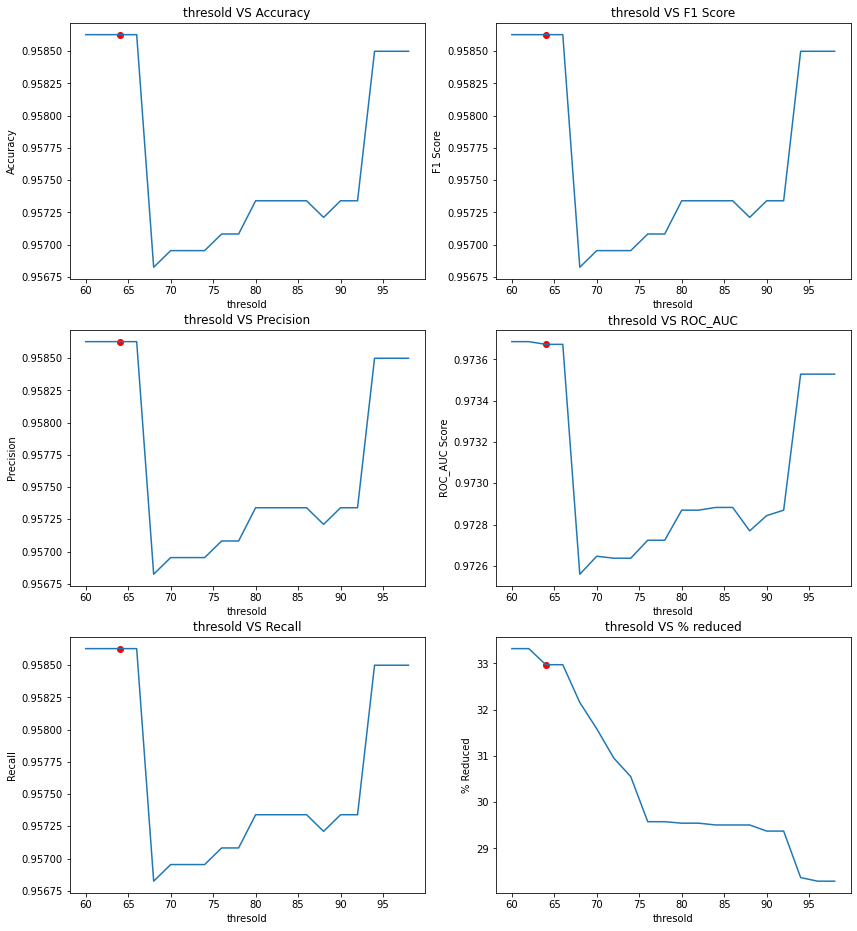

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(14,16))
axs[0, 0].plot(final_results_5['thresold'], final_results_5['testing_accuracy_score'])
axs[0, 0].set_title("thresold VS Accuracy")
axs[1, 0].plot(final_results_5['thresold'], final_results_5['testing_precision_score'])
axs[1, 0].set_title("thresold VS Precision")
axs[2, 0].plot(final_results_5['thresold'], final_results_5['testing_recall_score'])
axs[2, 0].set_title("thresold VS Recall")
axs[0, 1].plot(final_results_5['thresold'], final_results_5['testing_F1_score'])
axs[0, 1].set_title("thresold VS F1 Score")
axs[1, 1].plot(final_results_5['thresold'], final_results_5['testing_roc_auc_score'])
axs[1, 1].set_title("thresold VS ROC_AUC")
axs[2, 1].plot(final_results_5['thresold'], final_results_5['percent_reduced'])
axs[2, 1].set_title("thresold VS % reduced")



axs[0, 0].scatter(final_results_5['thresold'][2], final_results_5['testing_accuracy_score'][2], color = 'red')
axs[1, 0].scatter(final_results_5['thresold'][2], final_results_5['testing_precision_score'][2], color = 'red')
axs[2, 0].scatter(final_results_5['thresold'][2], final_results_5['testing_recall_score'][2], color = 'red')
axs[0, 1].scatter(final_results_5['thresold'][2], final_results_5['testing_F1_score'][2], color = 'red')
axs[1, 1].scatter(final_results_5['thresold'][2], final_results_5['testing_roc_auc_score'][2], color = 'red')
axs[2, 1].scatter(final_results_5['thresold'][2], final_results_5['percent_reduced'][2], color = 'red')



axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].set_xlabel("thresold")
axs[1, 0].set_ylabel("Precision")
axs[1, 0].set_xlabel("thresold")
axs[2, 0].set_ylabel("Recall")
axs[2, 0].set_xlabel("thresold")
axs[0, 1].set_ylabel("F1 Score")
axs[0, 1].set_xlabel("thresold")
axs[1, 1].set_ylabel("ROC_AUC Score")
axs[1, 1].set_xlabel("thresold")
axs[2, 1].set_ylabel("% Reduced")
axs[2, 1].set_xlabel("thresold")
fig.savefig("5 thresold.jpg")

In [ ]:
final_results_5

,thresold,Initial_data_size,Reduce_data_size,testing_accuracy_score,testing_precision_score,testing_recall_score,testing_F1_score,testing_roc_auc_score,percent_reduced
0,60,31033,20693,0.958629,0.958629,0.958629,0.958629,0.973686,33.319370
1,62,31033,20693,0.958629,0.958629,0.958629,0.958629,0.973686,33.319370
2,64,31033,20801,0.958629,0.958629,0.958629,0.958629,0.973673,32.971353
3,66,31033,20801,0.958629,0.958629,0.958629,0.958629,0.973673,32.971353
4,68,31033,21054,0.956824,0.956824,0.956824,0.956824,0.972559,32.156092
5,70,31033,21231,0.956953,0.956953,0.956953,0.956953,0.972646,31.585731
6,72,31033,21427,0.956953,0.956953,0.956953,0.956953,0.972637,30.954146
7,74,31033,21552,0.956953,0.956953,0.956953,0.956953,0.972637,30.551349
8,76,31033,21854,0.957082,0.957082,0.957082,0.957082,0.972724,29.578191
9,78,31033,21854,0.957082,0.957082,0.957082,0.957082,0.972724,29.578191


In [ ]:
clusters = []
y_train_clusters_data = []
clusters_point_not_passing_thresold = []
label_of_cluster_point_not_passing_thresold = []
for cluster_number in range(np.max(np.unique(clusters_list))+1):
    #print(cluster_number)
    a = np.bincount((y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)]))
    b = (np.max(a) / np.sum(a))*100
    if (b > 64):
        y_train_clusters_data.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
        points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
        points = pd.DataFrame(points)
        points = points[list(sfs5.k_feature_names_)]
        points = points.to_numpy()
        clusters.append(points)
    elif cluster_number != -1:
        label_of_cluster_point_not_passing_thresold.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
        points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
        points = pd.DataFrame(points)
        points = points[list(sfs5.k_feature_names_)]
        points = points.to_numpy()
        clusters_point_not_passing_thresold.append(points)
clusters = np.array(clusters)
y_train_clusters_data = np.array(y_train_clusters_data)
clusters_hull = []
labels_for_hull_points = []
for i in range(clusters.shape[0]):
    if(clusters[i].shape[0] > 5):
        ind = ConvexHull(clusters[i])
        hull_points = clusters[i][ind.vertices]
        labels_for_hull_points.append(y_train_clusters_data[i][ind.vertices])
        clusters_hull.append(hull_points)
clusters_hull = np.array(clusters_hull)
labels_for_hull_points = np.array(labels_for_hull_points)
X_modified_train_data_5 = clusters_hull[0]
y_modified_train_data_5 = labels_for_hull_points[0]
for i in range(clusters_hull.shape[0] - 1):
    X_modified_train_data_5 = np.vstack((X_modified_train_data_5, clusters_hull[i+1]))
    y_modified_train_data_5 = np.vstack((y_modified_train_data_5, labels_for_hull_points[i+1]))
#X_modified_train_data.shape, y_modified_train_data.shape
clusters_point_not_passing_thresold = np.array(clusters_point_not_passing_thresold)
label_of_cluster_point_not_passing_thresold = np.array(label_of_cluster_point_not_passing_thresold)
for i in range(clusters_point_not_passing_thresold.shape[0]):
    X_modified_train_data_5 = np.vstack((X_modified_train_data_5, clusters_point_not_passing_thresold[i]))
    y_modified_train_data_5 = np.vstack((y_modified_train_data_5, label_of_cluster_point_not_passing_thresold[i]))

In [ ]:
knn_5_algo = KNeighborsClassifier(n_neighbors=4)
knn_5_algo.fit(X_modified_train_data_5, y_modified_train_data_5)
y_pred2 = knn_5_algo.predict(X_test[list(sfs5.k_feature_names_)])


results_metrics['dimension'] = list(results_metrics['dimension']) + ["5 with algo"]
results_metrics['testing_accuracy'] = list(results_metrics['testing_accuracy']) + [accuracy_score(y_test, y_pred2)]
#print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
results_metrics['testing_precision'] = list(results_metrics['testing_precision']) + [precision_score(y_test, y_pred2,average='micro')]
results_metrics['testing_recall'] = list(results_metrics['testing_recall']) + [recall_score(y_test, y_pred2,average='micro')]
results_metrics['testing_F1_score'] = list(results_metrics['testing_F1_score']) + [f1_score(y_test, y_pred2,average='micro')]
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
results_metrics['testing_roc_auc_score'] = list(results_metrics['testing_roc_auc_score']) + [roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted')]
results_metrics['% reduced'] = list(results_metrics['% reduced']) + [final_results_5['percent_reduced'][2]]


"""
print("Accuracy : ",accuracy_score(y_test, y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
print("Precision :",precision_score(y_test, y_pred2,average='micro'))
print("Recall :",recall_score(y_test, y_pred2,average='micro'))
print("F1 Score :",f1_score(y_test, y_pred2,average='micro'))
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
print("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))
print("\n\n")
"""


'\nprint("Accuracy : ",accuracy_score(y_test, y_pred2))\nprint("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))\nprint("Precision :",precision_score(y_test, y_pred2,average=\'micro\'))\nprint("Recall :",recall_score(y_test, y_pred2,average=\'micro\'))\nprint("F1 Score :",f1_score(y_test, y_pred2,average=\'micro\'))\nonehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))\nprint("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= \'ovr\', average=\'weighted\'))\nprint("\n\n")\n'

In [ ]:
print_metric()

testing_accuracy
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598']


testing_precision
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598']


testing_recall
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598']


testing_F1_score
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598']


testing_roc_auc_score
['0.9855', '0.9850', '0.9837', '0.9837', '0.9790', '0.9797', '0.9748']


dimension
['36', '7 without algo', '7 with algo', '6 without algo', '6 with algo', '5 without algo', '5 with algo']


% reduced
['0.0000', '0.0000', '14.3654', '0.0000', '20.4041', '0.0000', '32.9714']




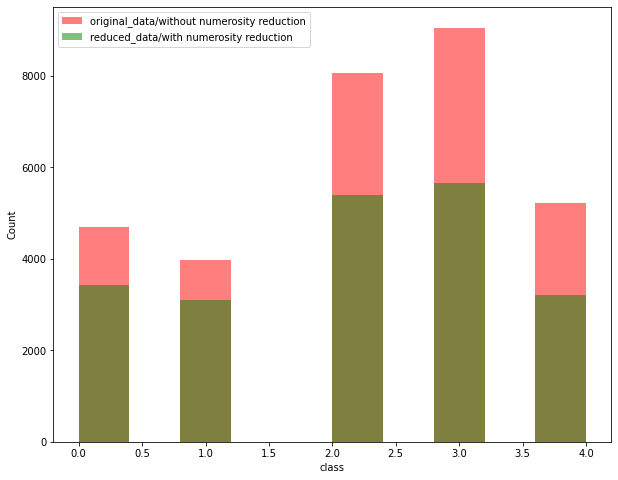

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(y_train, alpha = 0.5, color='r', label='original_data/without numerosity reduction')
plt.hist(y_modified_train_data_5, alpha = 0.5, color='g', label='reduced_data/with numerosity reduction')
plt.xlabel("class")
plt.ylabel("Count")
plt.legend(loc='upper left')
plt.show()

# 4 dimension

In [ ]:
# normalizing data for the cluster finding
scaler = MinMaxScaler()
pca4 = PCA(n_components = 4)
data_scaled4 = scaler.fit_transform(X_train, y_train)
data_scaled4 = pd.DataFrame(pca4.fit_transform(data_scaled4))

In [ ]:
data_scaled4.shape

(31033, 4)

In [ ]:
knn_4 = KNeighborsClassifier(n_neighbors=3)
sfs4 = sfs(knn_4, k_features=4, forward=True, cv = 7)
sfs4 = sfs4.fit(X_train, y_train)
print(sfs4.k_feature_names_)

(5, 7, 9, 12)


In [ ]:
#finding the right value of nearest neighbour
knn_4 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 15)}
knn_gscv_4 = GridSearchCV(knn_4, param_grid, cv=7)
knn_gscv_4.fit(X_train[list(sfs4.k_feature_names_)], y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
#right best params and validation score
print(knn_gscv_4.best_params_)
print(knn_gscv_4.best_score_)

{'n_neighbors': 5}
0.9475396124529653


In [ ]:
knn_4 = KNeighborsClassifier(n_neighbors=5)
knn_4.fit(X_train[list(sfs4.k_feature_names_)], y_train)
y_pred2 = knn_4.predict(X_test[list(sfs4.k_feature_names_)])


results_metrics['dimension'] = list(results_metrics['dimension']) + ["4 without algo"]
results_metrics['testing_accuracy'] = list(results_metrics['testing_accuracy']) + [accuracy_score(y_test, y_pred2)]
#print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
results_metrics['testing_precision'] = list(results_metrics['testing_precision']) + [precision_score(y_test, y_pred2,average='micro')]
results_metrics['testing_recall'] = list(results_metrics['testing_recall']) + [recall_score(y_test, y_pred2,average='micro')]
results_metrics['testing_F1_score'] = list(results_metrics['testing_F1_score']) + [f1_score(y_test, y_pred2,average='micro')]
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
results_metrics['testing_roc_auc_score'] = list(results_metrics['testing_roc_auc_score']) + [roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted')]
results_metrics['% reduced'] = list(results_metrics['% reduced']) + [0]


"""
print("Accuracy : ",accuracy_score(y_test, y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
print("Precision :",precision_score(y_test, y_pred2,average='micro'))
print("Recall :",recall_score(y_test, y_pred2,average='micro'))
print("F1 Score :",f1_score(y_test, y_pred2,average='micro'))
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
print("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))
print("\n\n")
"""

'\nprint("Accuracy : ",accuracy_score(y_test, y_pred2))\nprint("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))\nprint("Precision :",precision_score(y_test, y_pred2,average=\'micro\'))\nprint("Recall :",recall_score(y_test, y_pred2,average=\'micro\'))\nprint("F1 Score :",f1_score(y_test, y_pred2,average=\'micro\'))\nonehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))\nprint("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= \'ovr\', average=\'weighted\'))\nprint("\n\n")\n'

In [ ]:
print_metric()

testing_accuracy
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492']


testing_precision
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492']


testing_recall
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492']


testing_F1_score
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492']


testing_roc_auc_score
['0.9855', '0.9850', '0.9837', '0.9837', '0.9790', '0.9797', '0.9748', '0.9678']


dimension
['36', '7 without algo', '7 with algo', '6 without algo', '6 with algo', '5 without algo', '5 with algo', '4 without algo']


% reduced
['0.0000', '0.0000', '14.3654', '0.0000', '20.4041', '0.0000', '32.9714', '0.0000']




In [ ]:
#eps = EPS_value(data_scaled4)

In [ ]:
db_default4 = DBSCAN(eps = 0.040, min_samples = 4).fit(data_scaled4)
labels = db_default4.labels_
print(Counter(labels))

Counter({1: 8803, -1: 6013, 0: 1026, 4: 941, 29: 567, 49: 366, 12: 337, 9: 331, 18: 312, 23: 282, 53: 248, 19: 225, 40: 210, 27: 208, 25: 206, 22: 200, 2: 196, 50: 192, 47: 185, 21: 181, 58: 177, 24: 169, 6: 157, 10: 157, 8: 156, 20: 156, 13: 155, 3: 141, 57: 141, 11: 137, 35: 136, 74: 130, 91: 125, 109: 124, 44: 122, 63: 121, 32: 117, 48: 113, 62: 112, 14: 111, 28: 111, 36: 111, 5: 109, 68: 109, 65: 107, 83: 106, 121: 105, 26: 104, 125: 104, 16: 103, 94: 102, 107: 101, 34: 100, 45: 100, 92: 100, 7: 98, 30: 98, 118: 94, 132: 94, 93: 92, 64: 89, 140: 89, 71: 83, 31: 82, 100: 82, 96: 81, 38: 79, 89: 78, 60: 77, 103: 77, 81: 76, 85: 74, 42: 73, 77: 72, 150: 71, 134: 71, 55: 70, 119: 69, 52: 68, 88: 66, 75: 66, 111: 62, 43: 60, 70: 59, 145: 57, 97: 55, 128: 55, 179: 55, 33: 54, 99: 54, 78: 53, 54: 52, 76: 50, 170: 47, 101: 45, 120: 43, 69: 42, 72: 42, 61: 39, 82: 39, 102: 38, 41: 37, 56: 37, 147: 37, 235: 34, 212: 33, 216: 32, 39: 31, 90: 31, 136: 31, 127: 31, 146: 30, 104: 29, 161: 28, 15

In [ ]:
clusters_list = np.array(db_default4.labels_)

testing_accuracy_score_on_4 = []
testing_precision_score_on_4 = []
testing_recall_score_on_4 = []
testing_F1_score_on_4 = []
testing_roc_auc_score_on_4 = []
number_of_data_point_after_reduction_4 = []
onehot_encoder = OneHotEncoder(sparse=False)

test_data_taken_4 = X_test[list(sfs4.k_feature_names_)]

for thresold in range(60, 100, 2):
    clusters = []
    y_train_clusters_data = []
    clusters_point_not_passing_thresold = []
    label_of_cluster_point_not_passing_thresold = []
    for cluster_number in range(np.max(np.unique(clusters_list))+1):
        #print(cluster_number)
        a = np.bincount((y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)]))
        b = (np.max(a) / np.sum(a))*100
        if (b > thresold):
            y_train_clusters_data.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
            points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
            points = pd.DataFrame(points)
            points = points[list(sfs4.k_feature_names_)]
            points = points.to_numpy()
            clusters.append(points)
        elif cluster_number != -1:
            label_of_cluster_point_not_passing_thresold.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
            points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
            points = pd.DataFrame(points)
            points = points[list(sfs4.k_feature_names_)]
            points = points.to_numpy()
            clusters_point_not_passing_thresold.append(points)
    clusters = np.array(clusters)
    y_train_clusters_data = np.array(y_train_clusters_data)
    clusters_hull = []
    labels_for_hull_points = []
    for i in range(clusters.shape[0]):
        if(clusters[i].shape[0] > 4):
            ind = ConvexHull(clusters[i])
            hull_points = clusters[i][ind.vertices]
            labels_for_hull_points.append(y_train_clusters_data[i][ind.vertices])
            clusters_hull.append(hull_points)
    clusters_hull = np.array(clusters_hull)
    labels_for_hull_points = np.array(labels_for_hull_points)
    X_modified_train_data_4 = clusters_hull[0]
    y_modified_train_data_4 = labels_for_hull_points[0]
    for i in range(clusters_hull.shape[0] - 1):
        X_modified_train_data_4 = np.vstack((X_modified_train_data_4, clusters_hull[i+1]))
        y_modified_train_data_4 = np.vstack((y_modified_train_data_4, labels_for_hull_points[i+1]))
    #X_modified_train_data.shape, y_modified_train_data.shape
    clusters_point_not_passing_thresold = np.array(clusters_point_not_passing_thresold)
    label_of_cluster_point_not_passing_thresold = np.array(label_of_cluster_point_not_passing_thresold)
    for i in range(clusters_point_not_passing_thresold.shape[0]):
        X_modified_train_data_4 = np.vstack((X_modified_train_data_4, clusters_point_not_passing_thresold[i]))
        y_modified_train_data_4 = np.vstack((y_modified_train_data_4, label_of_cluster_point_not_passing_thresold[i]))
        
    number_of_data_point_after_reduction_4.append(X_modified_train_data_4.shape[0])
    
    knn4_algo =  KNeighborsClassifier(n_neighbors=5, weights = 'distance').fit(X_modified_train_data_4, y_modified_train_data_4)
    
    y_pred2 = knn4_algo.predict(test_data_taken_4)
    
    
    testing_accuracy_score_on_4.append(accuracy_score(y_test, y_pred2))
    #print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
    testing_precision_score_on_4.append(precision_score(y_test, y_pred2,average='micro'))
    testing_recall_score_on_4.append(recall_score(y_test, y_pred2,average='micro'))
    testing_F1_score_on_4.append(f1_score(y_test, y_pred2,average='micro'))
    onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
    testing_roc_auc_score_on_4.append(roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))

    
            
            
        

In [ ]:
testing_accuracy_score_on_4 = np.array(testing_accuracy_score_on_4)
testing_precision_score_on_4 = np.array(testing_precision_score_on_4 )
testing_recall_score_on_4 = np.array(testing_recall_score_on_4 )
testing_F1_score_on_4 = np.array(testing_F1_score_on_4 )
number_of_data_point_after_reduction_4 = np.array(number_of_data_point_after_reduction_4)
testing_roc_auc_score_on_4  = np.array(testing_roc_auc_score_on_4)

np.save('testing_accuracy_score_on_4', testing_accuracy_score_on_4)
np.save('testing_precision_score_on_4', testing_precision_score_on_4)
np.save('testing_recall_score_on_4', testing_recall_score_on_4)
np.save('testing_F1_score_on_4', testing_F1_score_on_4)
np.save('number_of_data_point_after_reduction_4', number_of_data_point_after_reduction_4)
np.save('testing_roc_auc_scor4', testing_roc_auc_score_on_4)

In [ ]:
thresold = [i for i in range(60, 99, 2)]
Initial_data = [X_train.shape[0] for i in range(60, 99, 2)]
d = {'thresold': thresold,
    'Initial_data_size': Initial_data}
final_results_4 = pd.DataFrame(d)
final_results_4['Reduce_data_size'] = number_of_data_point_after_reduction_4
final_results_4['testing_accuracy_score'] = testing_accuracy_score_on_4
final_results_4['testing_precision_score'] = testing_precision_score_on_4
final_results_4['testing_recall_score'] = testing_recall_score_on_4
final_results_4['testing_F1_score'] = testing_F1_score_on_4
final_results_4['testing_roc_auc_score'] = testing_roc_auc_score_on_4
final_results_4['percent_reduced'] = (((final_results_4['Initial_data_size'] - final_results_4['Reduce_data_size']) /  final_results_4['Initial_data_size'])* 100 )
final_results_4.to_csv('final_results_4.csv')

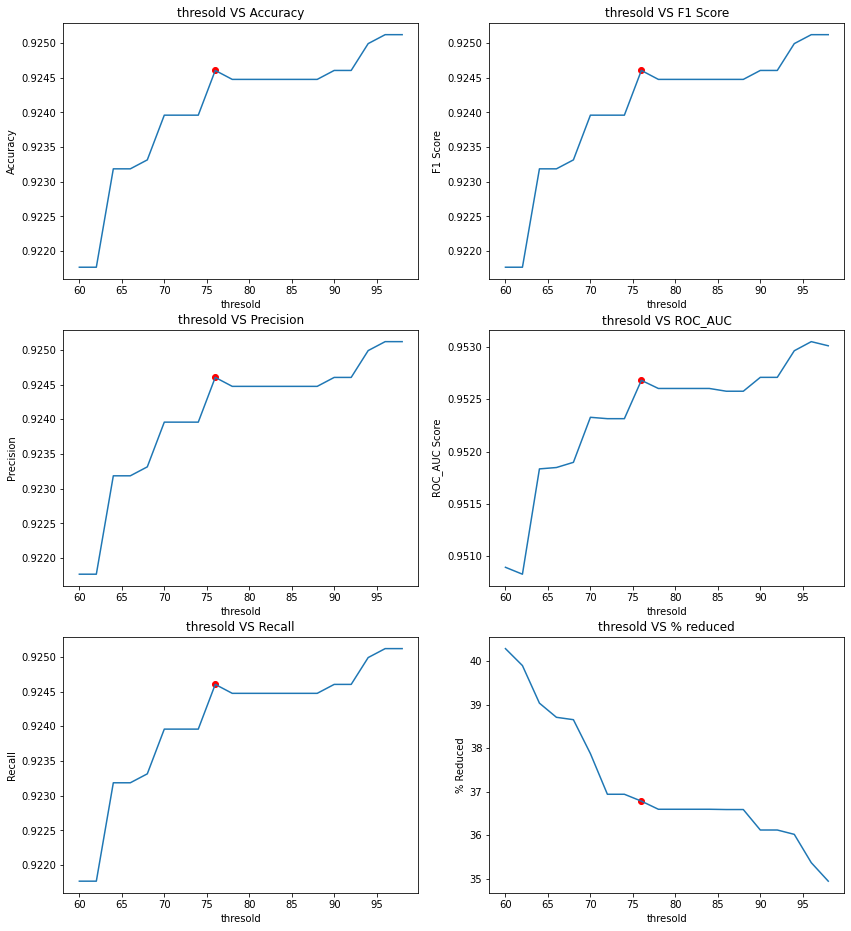

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(14,16))
axs[0, 0].plot(final_results_4['thresold'], final_results_4['testing_accuracy_score'])
axs[0, 0].set_title("thresold VS Accuracy")
axs[1, 0].plot(final_results_4['thresold'], final_results_4['testing_precision_score'])
axs[1, 0].set_title("thresold VS Precision")
axs[2, 0].plot(final_results_4['thresold'], final_results_4['testing_recall_score'])
axs[2, 0].set_title("thresold VS Recall")
axs[0, 1].plot(final_results_4['thresold'], final_results_4['testing_F1_score'])
axs[0, 1].set_title("thresold VS F1 Score")
axs[1, 1].plot(final_results_4['thresold'], final_results_4['testing_roc_auc_score'])
axs[1, 1].set_title("thresold VS ROC_AUC")
axs[2, 1].plot(final_results_4['thresold'], final_results_4['percent_reduced'])
axs[2, 1].set_title("thresold VS % reduced")


axs[0, 0].scatter(final_results_4['thresold'][8], final_results_4['testing_accuracy_score'][8], color = 'red')
axs[1, 0].scatter(final_results_4['thresold'][8], final_results_4['testing_precision_score'][8], color = 'red')
axs[2, 0].scatter(final_results_4['thresold'][8], final_results_4['testing_recall_score'][8], color = 'red')
axs[0, 1].scatter(final_results_4['thresold'][8], final_results_4['testing_F1_score'][8], color = 'red')
axs[1, 1].scatter(final_results_4['thresold'][8], final_results_4['testing_roc_auc_score'][8], color = 'red')
axs[2, 1].scatter(final_results_4['thresold'][8], final_results_4['percent_reduced'][8], color = 'red')


axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].set_xlabel("thresold")
axs[1, 0].set_ylabel("Precision")
axs[1, 0].set_xlabel("thresold")
axs[2, 0].set_ylabel("Recall")
axs[2, 0].set_xlabel("thresold")
axs[0, 1].set_ylabel("F1 Score")
axs[0, 1].set_xlabel("thresold")
axs[1, 1].set_ylabel("ROC_AUC Score")
axs[1, 1].set_xlabel("thresold")
axs[2, 1].set_ylabel("% Reduced")
axs[2, 1].set_xlabel("thresold")
fig.savefig("4 thresold.jpg")

In [ ]:
final_results_4

,thresold,Initial_data_size,Reduce_data_size,testing_accuracy_score,testing_precision_score,testing_recall_score,testing_F1_score,testing_roc_auc_score,percent_reduced
0,60,31033,18530,0.921768,0.921768,0.921768,0.921768,0.950894,40.289369
1,62,31033,18651,0.921768,0.921768,0.921768,0.921768,0.950828,39.899462
2,64,31033,18919,0.923186,0.923186,0.923186,0.923186,0.951835,39.035865
3,66,31033,19020,0.923186,0.923186,0.923186,0.923186,0.951848,38.710405
4,68,31033,19037,0.923315,0.923315,0.923315,0.923315,0.951897,38.655625
5,70,31033,19279,0.923959,0.923959,0.923959,0.923959,0.952328,37.875810
6,72,31033,19569,0.923959,0.923959,0.923959,0.923959,0.952315,36.941321
7,74,31033,19569,0.923959,0.923959,0.923959,0.923959,0.952315,36.941321
8,76,31033,19618,0.924604,0.924604,0.924604,0.924604,0.952681,36.783424
9,78,31033,19676,0.924475,0.924475,0.924475,0.924475,0.952604,36.596526


In [ ]:
clusters = []
y_train_clusters_data = []
clusters_point_not_passing_thresold = []
label_of_cluster_point_not_passing_thresold = []
for cluster_number in range(np.max(np.unique(clusters_list))+1):
    #print(cluster_number)
    a = np.bincount((y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)]))
    b = (np.max(a) / np.sum(a))*100
    if (b > 76):
        y_train_clusters_data.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
        points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
        points = pd.DataFrame(points)
        points = points[list(sfs4.k_feature_names_)]
        points = points.to_numpy()
        clusters.append(points)
    elif cluster_number != -1:
        label_of_cluster_point_not_passing_thresold.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
        points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
        points = pd.DataFrame(points)
        points = points[list(sfs4.k_feature_names_)]
        points = points.to_numpy()
        clusters_point_not_passing_thresold.append(points)
clusters = np.array(clusters)
y_train_clusters_data = np.array(y_train_clusters_data)
clusters_hull = []
labels_for_hull_points = []
for i in range(clusters.shape[0]):
    if(clusters[i].shape[0] > 4):
        ind = ConvexHull(clusters[i])
        hull_points = clusters[i][ind.vertices]
        labels_for_hull_points.append(y_train_clusters_data[i][ind.vertices])
        clusters_hull.append(hull_points)
clusters_hull = np.array(clusters_hull)
labels_for_hull_points = np.array(labels_for_hull_points)
X_modified_train_data_4 = clusters_hull[0]
y_modified_train_data_4 = labels_for_hull_points[0]
for i in range(clusters_hull.shape[0] - 1):
    X_modified_train_data_4 = np.vstack((X_modified_train_data_4, clusters_hull[i+1]))
    y_modified_train_data_4 = np.vstack((y_modified_train_data_4, labels_for_hull_points[i+1]))
#X_modified_train_data.shape, y_modified_train_data.shape
clusters_point_not_passing_thresold = np.array(clusters_point_not_passing_thresold)
label_of_cluster_point_not_passing_thresold = np.array(label_of_cluster_point_not_passing_thresold)
for i in range(clusters_point_not_passing_thresold.shape[0]):
    X_modified_train_data_4 = np.vstack((X_modified_train_data_4, clusters_point_not_passing_thresold[i]))
    y_modified_train_data_4 = np.vstack((y_modified_train_data_4, label_of_cluster_point_not_passing_thresold[i]))

In [ ]:
knn_4_algo = KNeighborsClassifier(n_neighbors=5)
knn_4_algo.fit(X_modified_train_data_4, y_modified_train_data_4)
y_pred2 = knn_4_algo.predict(X_test[list(sfs4.k_feature_names_)])


results_metrics['dimension'] = list(results_metrics['dimension']) + ["4 with algo"]
results_metrics['testing_accuracy'] = list(results_metrics['testing_accuracy']) + [accuracy_score(y_test, y_pred2)]
#print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
results_metrics['testing_precision'] = list(results_metrics['testing_precision']) + [precision_score(y_test, y_pred2,average='micro')]
results_metrics['testing_recall'] = list(results_metrics['testing_recall']) + [recall_score(y_test, y_pred2,average='micro')]
results_metrics['testing_F1_score'] = list(results_metrics['testing_F1_score']) + [f1_score(y_test, y_pred2,average='micro')]
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
results_metrics['testing_roc_auc_score'] = list(results_metrics['testing_roc_auc_score']) + [roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted')]
results_metrics['% reduced'] = list(results_metrics['% reduced']) + [final_results_4['percent_reduced'][8]]


"""
print("Accuracy : ",accuracy_score(y_test, y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
print("Precision :",precision_score(y_test, y_pred2,average='micro'))
print("Recall :",recall_score(y_test, y_pred2,average='micro'))
print("F1 Score :",f1_score(y_test, y_pred2,average='micro'))
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
print("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))
print("\n\n")
"""


'\nprint("Accuracy : ",accuracy_score(y_test, y_pred2))\nprint("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))\nprint("Precision :",precision_score(y_test, y_pred2,average=\'micro\'))\nprint("Recall :",recall_score(y_test, y_pred2,average=\'micro\'))\nprint("F1 Score :",f1_score(y_test, y_pred2,average=\'micro\'))\nonehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))\nprint("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= \'ovr\', average=\'weighted\'))\nprint("\n\n")\n'

In [ ]:
print_metric()

testing_accuracy
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247']


testing_precision
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247']


testing_recall
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247']


testing_F1_score
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247']


testing_roc_auc_score
['0.9855', '0.9850', '0.9837', '0.9837', '0.9790', '0.9797', '0.9748', '0.9678', '0.9528']


dimension
['36', '7 without algo', '7 with algo', '6 without algo', '6 with algo', '5 without algo', '5 with algo', '4 without algo', '4 with algo']


% reduced
['0.0000', '0.0000', '14.3654', '0.0000', '20.4041', '0.0000', '32.9714', '0.0000', '36.7834']




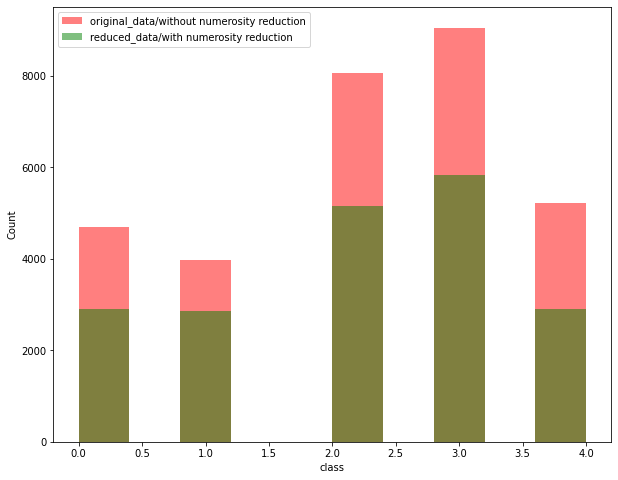

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(y_train, alpha = 0.5, color='r', label='original_data/without numerosity reduction')
plt.hist(y_modified_train_data_4, alpha = 0.5, color='g', label='reduced_data/with numerosity reduction')
plt.xlabel("class")
plt.ylabel("Count")
plt.legend(loc='upper left')
plt.show()

# 3 Dimension

In [ ]:
# normalizing data for the cluster finding
scaler = MinMaxScaler()
pca3 = PCA(n_components = 3)
data_scaled3 = scaler.fit_transform(X_train, y_train)
data_scaled3 = pd.DataFrame(pca3.fit_transform(data_scaled3))

In [ ]:
data_scaled3.shape

(31033, 3)

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
sfs3 = sfs(knn_3, k_features=3, forward=True, cv = 7)
sfs3 = sfs3.fit(X_train, y_train)
print(sfs3.k_feature_names_)

(7, 9, 12)


In [ ]:
#finding the right value of nearest neighbour
knn_3 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 15)}
knn_gscv_3 = GridSearchCV(knn_3, param_grid, cv=7)
knn_gscv_3.fit(X_train[list(sfs3.k_feature_names_)], y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
#right best params and validation score
print(knn_gscv_3.best_params_)
print(knn_gscv_3.best_score_)

{'n_neighbors': 7}
0.8755838571194982


In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=7)
knn_3.fit(X_train[list(sfs3.k_feature_names_)], y_train)
y_pred2 = knn_3.predict(X_test[list(sfs3.k_feature_names_)])


results_metrics['dimension'] = list(results_metrics['dimension']) + ["3 without algo"]
results_metrics['testing_accuracy'] = list(results_metrics['testing_accuracy']) + [accuracy_score(y_test, y_pred2)]
#print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
results_metrics['testing_precision'] = list(results_metrics['testing_precision']) + [precision_score(y_test, y_pred2,average='micro')]
results_metrics['testing_recall'] = list(results_metrics['testing_recall']) + [recall_score(y_test, y_pred2,average='micro')]
results_metrics['testing_F1_score'] = list(results_metrics['testing_F1_score']) + [f1_score(y_test, y_pred2,average='micro')]
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
results_metrics['testing_roc_auc_score'] = list(results_metrics['testing_roc_auc_score']) + [roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted')]
results_metrics['% reduced'] = list(results_metrics['% reduced']) + [0]


"""
print("Accuracy : ",accuracy_score(y_test, y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
print("Precision :",precision_score(y_test, y_pred2,average='micro'))
print("Recall :",recall_score(y_test, y_pred2,average='micro'))
print("F1 Score :",f1_score(y_test, y_pred2,average='micro'))
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
print("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))
print("\n\n")
"""

'\nprint("Accuracy : ",accuracy_score(y_test, y_pred2))\nprint("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))\nprint("Precision :",precision_score(y_test, y_pred2,average=\'micro\'))\nprint("Recall :",recall_score(y_test, y_pred2,average=\'micro\'))\nprint("F1 Score :",f1_score(y_test, y_pred2,average=\'micro\'))\nonehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))\nprint("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= \'ovr\', average=\'weighted\'))\nprint("\n\n")\n'

In [ ]:
print_metric()

testing_accuracy
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247', '0.8791']


testing_precision
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247', '0.8791']


testing_recall
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247', '0.8791']


testing_F1_score
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247', '0.8791']


testing_roc_auc_score
['0.9855', '0.9850', '0.9837', '0.9837', '0.9790', '0.9797', '0.9748', '0.9678', '0.9528', '0.9233']


dimension
['36', '7 without algo', '7 with algo', '6 without algo', '6 with algo', '5 without algo', '5 with algo', '4 without algo', '4 with algo', '3 without algo']


% reduced
['0.0000', '0.0000', '14.3654', '0.0000', '20.4041', '0.0000', '32.9714', '0.0000', '36.7834', '0.0000']




In [ ]:
#eps = EPS_value(data_scaled3)

In [ ]:
db_default3 = DBSCAN(eps = 0.040, min_samples = 3).fit(data_scaled3)
labels = db_default3.labels_
print(Counter(labels))

Counter({0: 24265, -1: 1093, 1: 959, 4: 584, 8: 584, 6: 355, 3: 252, 9: 252, 7: 204, 34: 195, 2: 158, 30: 130, 22: 129, 23: 127, 15: 123, 14: 118, 12: 107, 16: 104, 21: 100, 5: 95, 13: 91, 20: 89, 25: 89, 17: 88, 36: 78, 28: 72, 45: 48, 10: 39, 27: 31, 80: 17, 60: 16, 46: 15, 26: 14, 66: 13, 11: 12, 53: 10, 54: 10, 58: 10, 61: 10, 77: 10, 56: 9, 39: 8, 24: 7, 88: 7, 32: 7, 42: 7, 59: 7, 62: 7, 73: 7, 35: 6, 47: 6, 48: 6, 75: 6, 87: 6, 94: 6, 37: 5, 33: 5, 43: 5, 78: 5, 49: 5, 57: 5, 63: 5, 68: 5, 98: 5, 89: 5, 19: 4, 29: 4, 31: 4, 44: 4, 96: 4, 50: 4, 67: 4, 99: 4, 70: 4, 71: 4, 119: 4, 91: 4, 79: 4, 81: 4, 84: 4, 101: 4, 104: 4, 114: 3, 18: 3, 97: 3, 38: 3, 107: 3, 40: 3, 41: 3, 112: 3, 117: 3, 51: 3, 52: 3, 102: 3, 55: 3, 65: 3, 115: 3, 64: 3, 116: 3, 69: 3, 74: 3, 72: 3, 76: 3, 118: 3, 93: 3, 82: 3, 83: 3, 85: 3, 86: 3, 90: 3, 92: 3, 95: 3, 110: 3, 113: 3, 100: 3, 111: 3, 103: 3, 105: 3, 106: 3, 108: 3, 109: 3})


In [ ]:
clusters_list = np.array(db_default3.labels_)

testing_accuracy_score_on_3 = []
testing_precision_score_on_3 = []
testing_recall_score_on_3 = []
testing_F1_score_on_3 = []
testing_roc_auc_score_on_3 = []
number_of_data_point_after_reduction_3 = []
onehot_encoder = OneHotEncoder(sparse=False)

test_data_taken_3 = X_test[list(sfs3.k_feature_names_)]

for thresold in range(60, 100, 2):
    clusters = []
    y_train_clusters_data = []
    clusters_point_not_passing_thresold = []
    label_of_cluster_point_not_passing_thresold = []
    for cluster_number in range(np.max(np.unique(clusters_list))+1):
        #print(cluster_number)
        a = np.bincount((y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)]))
        b = (np.max(a) / np.sum(a))*100
        if (b > thresold):
            y_train_clusters_data.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
            points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
            points = pd.DataFrame(points)
            points = points[list(sfs3.k_feature_names_)]
            points = points.to_numpy()
            clusters.append(points)
        elif cluster_number != -1:
            label_of_cluster_point_not_passing_thresold.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
            points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
            points = pd.DataFrame(points)
            points = points[list(sfs3.k_feature_names_)]
            points = points.to_numpy()
            clusters_point_not_passing_thresold.append(points)
    clusters = np.array(clusters)
    y_train_clusters_data = np.array(y_train_clusters_data)
    clusters_hull = []
    labels_for_hull_points = []
    for i in range(clusters.shape[0]):
        if(clusters[i].shape[0] > 3):
            ind = ConvexHull(clusters[i])
            hull_points = clusters[i][ind.vertices]
            labels_for_hull_points.append(y_train_clusters_data[i][ind.vertices])
            clusters_hull.append(hull_points)
    clusters_hull = np.array(clusters_hull)
    labels_for_hull_points = np.array(labels_for_hull_points)
    X_modified_train_data_3 = clusters_hull[0]
    y_modified_train_data_3 = labels_for_hull_points[0]
    for i in range(clusters_hull.shape[0] - 1):
        X_modified_train_data_3 = np.vstack((X_modified_train_data_3, clusters_hull[i+1]))
        y_modified_train_data_3 = np.vstack((y_modified_train_data_3, labels_for_hull_points[i+1]))
    #X_modified_train_data.shape, y_modified_train_data.shape
    clusters_point_not_passing_thresold = np.array(clusters_point_not_passing_thresold)
    label_of_cluster_point_not_passing_thresold = np.array(label_of_cluster_point_not_passing_thresold)
    for i in range(clusters_point_not_passing_thresold.shape[0]):
        X_modified_train_data_3 = np.vstack((X_modified_train_data_3, clusters_point_not_passing_thresold[i]))
        y_modified_train_data_3 = np.vstack((y_modified_train_data_3, label_of_cluster_point_not_passing_thresold[i]))
        
    number_of_data_point_after_reduction_3.append(X_modified_train_data_3.shape[0])
    
    knn4_algo =  KNeighborsClassifier(n_neighbors=7, weights = 'distance').fit(X_modified_train_data_3, y_modified_train_data_3)
    
    y_pred2 = knn4_algo.predict(test_data_taken_3)
    
    
    testing_accuracy_score_on_3.append(accuracy_score(y_test, y_pred2))
    #print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
    testing_precision_score_on_3.append(precision_score(y_test, y_pred2,average='micro'))
    testing_recall_score_on_3.append(recall_score(y_test, y_pred2,average='micro'))
    testing_F1_score_on_3.append(f1_score(y_test, y_pred2,average='micro'))
    onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
    testing_roc_auc_score_on_3.append(roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))

    
            
            
        

In [ ]:
testing_accuracy_score_on_3 = np.array(testing_accuracy_score_on_3)
testing_precision_score_on_3 = np.array(testing_precision_score_on_3 )
testing_recall_score_on_3 = np.array(testing_recall_score_on_3 )
testing_F1_score_on_3 = np.array(testing_F1_score_on_3 )
number_of_data_point_after_reduction_3 = np.array(number_of_data_point_after_reduction_3)
testing_roc_auc_score_on_3  = np.array(testing_roc_auc_score_on_3)

np.save('testing_accuracy_score_on_3', testing_accuracy_score_on_3)
np.save('testing_precision_score_on_3', testing_precision_score_on_3)
np.save('testing_recall_score_on_3', testing_recall_score_on_3)
np.save('testing_F1_score_on_3', testing_F1_score_on_3)
np.save('number_of_data_point_after_reduction_3', number_of_data_point_after_reduction_3)
np.save('testing_roc_auc_scor3', testing_roc_auc_score_on_3)

In [ ]:
thresold = [i for i in range(60, 99, 2)]
Initial_data = [X_train.shape[0] for i in range(60, 99, 2)]
d = {'thresold': thresold,
    'Initial_data_size': Initial_data}
final_results_3 = pd.DataFrame(d)
final_results_3['Reduce_data_size'] = number_of_data_point_after_reduction_3
final_results_3['testing_accuracy_score'] = testing_accuracy_score_on_3
final_results_3['testing_precision_score'] = testing_precision_score_on_3
final_results_3['testing_recall_score'] = testing_recall_score_on_3
final_results_3['testing_F1_score'] = testing_F1_score_on_3
final_results_3['testing_roc_auc_score'] = testing_roc_auc_score_on_3
final_results_3['percent_reduced'] = (((final_results_3['Initial_data_size'] - final_results_3['Reduce_data_size']) /  final_results_3['Initial_data_size'])* 100 )
final_results_3.to_csv('final_results_3.csv')

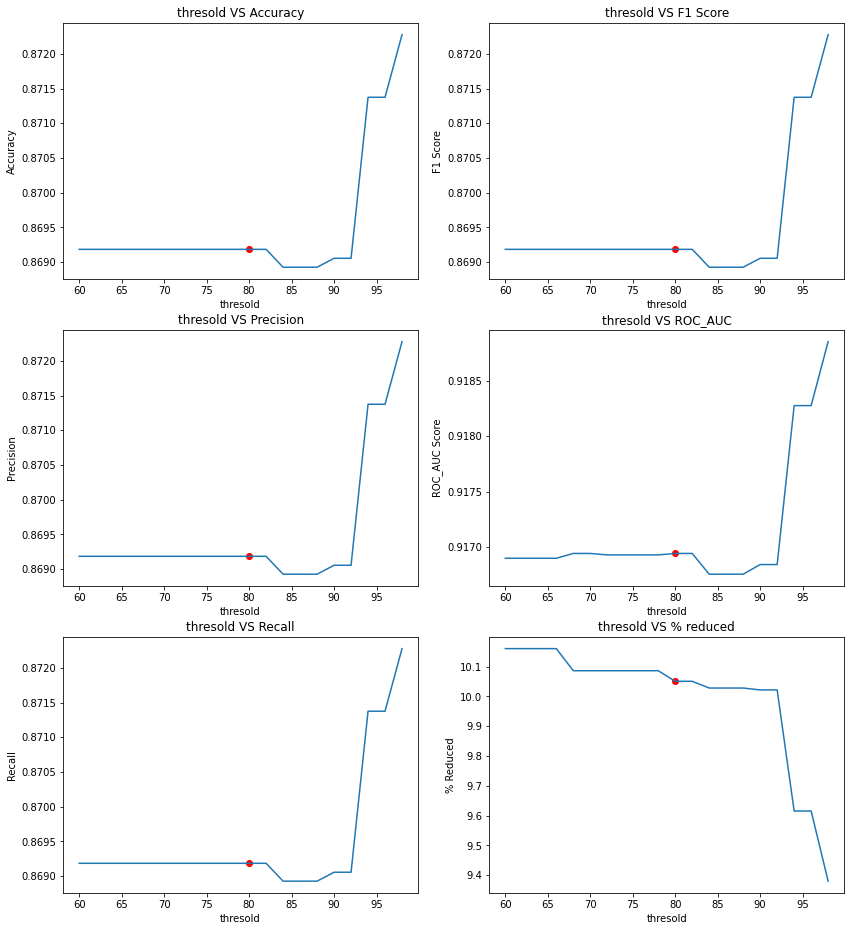

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(14,16))
axs[0, 0].plot(final_results_3['thresold'], final_results_3['testing_accuracy_score'])
axs[0, 0].set_title("thresold VS Accuracy")
axs[1, 0].plot(final_results_3['thresold'], final_results_3['testing_precision_score'])
axs[1, 0].set_title("thresold VS Precision")
axs[2, 0].plot(final_results_3['thresold'], final_results_3['testing_recall_score'])
axs[2, 0].set_title("thresold VS Recall")
axs[0, 1].plot(final_results_3['thresold'], final_results_3['testing_F1_score'])
axs[0, 1].set_title("thresold VS F1 Score")
axs[1, 1].plot(final_results_3['thresold'], final_results_3['testing_roc_auc_score'])
axs[1, 1].set_title("thresold VS ROC_AUC")
axs[2, 1].plot(final_results_3['thresold'], final_results_3['percent_reduced'])
axs[2, 1].set_title("thresold VS % reduced")


axs[0, 0].scatter(final_results_3['thresold'][10], final_results_3['testing_accuracy_score'][10], color = 'red')
axs[1, 0].scatter(final_results_3['thresold'][10], final_results_3['testing_precision_score'][10], color = 'red')
axs[2, 0].scatter(final_results_3['thresold'][10], final_results_3['testing_recall_score'][10], color = 'red')
axs[0, 1].scatter(final_results_3['thresold'][10], final_results_3['testing_F1_score'][10], color = 'red')
axs[1, 1].scatter(final_results_3['thresold'][10], final_results_3['testing_roc_auc_score'][10], color = 'red')
axs[2, 1].scatter(final_results_3['thresold'][10], final_results_3['percent_reduced'][10], color = 'red')



axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].set_xlabel("thresold")
axs[1, 0].set_ylabel("Precision")
axs[1, 0].set_xlabel("thresold")
axs[2, 0].set_ylabel("Recall")
axs[2, 0].set_xlabel("thresold")
axs[0, 1].set_ylabel("F1 Score")
axs[0, 1].set_xlabel("thresold")
axs[1, 1].set_ylabel("ROC_AUC Score")
axs[1, 1].set_xlabel("thresold")
axs[2, 1].set_ylabel("% Reduced")
axs[2, 1].set_xlabel("thresold")
fig.savefig("3 thresold.jpg")

In [ ]:
final_results_3

,thresold,Initial_data_size,Reduce_data_size,testing_accuracy_score,testing_precision_score,testing_recall_score,testing_F1_score,testing_roc_auc_score,percent_reduced
0,60,31033,27880,0.869184,0.869184,0.869184,0.869184,0.916898,10.160152
1,62,31033,27880,0.869184,0.869184,0.869184,0.869184,0.916898,10.160152
2,64,31033,27880,0.869184,0.869184,0.869184,0.869184,0.916898,10.160152
3,66,31033,27880,0.869184,0.869184,0.869184,0.869184,0.916898,10.160152
4,68,31033,27903,0.869184,0.869184,0.869184,0.869184,0.916942,10.086037
5,70,31033,27903,0.869184,0.869184,0.869184,0.869184,0.916942,10.086037
6,72,31033,27903,0.869184,0.869184,0.869184,0.869184,0.916929,10.086037
7,74,31033,27903,0.869184,0.869184,0.869184,0.869184,0.916929,10.086037
8,76,31033,27903,0.869184,0.869184,0.869184,0.869184,0.916929,10.086037
9,78,31033,27903,0.869184,0.869184,0.869184,0.869184,0.916929,10.086037


In [ ]:
clusters = []
y_train_clusters_data = []
clusters_point_not_passing_thresold = []
label_of_cluster_point_not_passing_thresold = []
for cluster_number in range(np.max(np.unique(clusters_list))+1):
    #print(cluster_number)
    a = np.bincount((y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)]))
    b = (np.max(a) / np.sum(a))*100
    if (b > 80):
        y_train_clusters_data.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
        points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
        points = pd.DataFrame(points)
        points = points[list(sfs3.k_feature_names_)]
        points = points.to_numpy()
        clusters.append(points)
    elif cluster_number != -1:
        label_of_cluster_point_not_passing_thresold.append(y_train.to_numpy().astype(int)[np.where(clusters_list == cluster_number)].reshape(-1, 1))
        points = X_train.to_numpy()[np.where(clusters_list == cluster_number)]
        points = pd.DataFrame(points)
        points = points[list(sfs3.k_feature_names_)]
        points = points.to_numpy()
        clusters_point_not_passing_thresold.append(points)
clusters = np.array(clusters)
y_train_clusters_data = np.array(y_train_clusters_data)
clusters_hull = []
labels_for_hull_points = []
for i in range(clusters.shape[0]):
    if(clusters[i].shape[0] > 4):
        ind = ConvexHull(clusters[i])
        hull_points = clusters[i][ind.vertices]
        labels_for_hull_points.append(y_train_clusters_data[i][ind.vertices])
        clusters_hull.append(hull_points)
clusters_hull = np.array(clusters_hull)
labels_for_hull_points = np.array(labels_for_hull_points)
X_modified_train_data_3 = clusters_hull[0]
y_modified_train_data_3 = labels_for_hull_points[0]
for i in range(clusters_hull.shape[0] - 1):
    X_modified_train_data_3 = np.vstack((X_modified_train_data_3, clusters_hull[i+1]))
    y_modified_train_data_3 = np.vstack((y_modified_train_data_3, labels_for_hull_points[i+1]))
#X_modified_train_data.shape, y_modified_train_data.shape
clusters_point_not_passing_thresold = np.array(clusters_point_not_passing_thresold)
label_of_cluster_point_not_passing_thresold = np.array(label_of_cluster_point_not_passing_thresold)
for i in range(clusters_point_not_passing_thresold.shape[0]):
    X_modified_train_data_3 = np.vstack((X_modified_train_data_3, clusters_point_not_passing_thresold[i]))
    y_modified_train_data_3 = np.vstack((y_modified_train_data_3, label_of_cluster_point_not_passing_thresold[i]))

In [ ]:
knn_3_algo = KNeighborsClassifier(n_neighbors=7)
knn_3_algo.fit(X_modified_train_data_3, y_modified_train_data_3)
y_pred2 = knn_3_algo.predict(X_test[list(sfs3.k_feature_names_)])


results_metrics['dimension'] = list(results_metrics['dimension']) + ["3 with algo"]
results_metrics['testing_accuracy'] = list(results_metrics['testing_accuracy']) + [accuracy_score(y_test, y_pred2)]
#print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
results_metrics['testing_precision'] = list(results_metrics['testing_precision']) + [precision_score(y_test, y_pred2,average='micro')]
results_metrics['testing_recall'] = list(results_metrics['testing_recall']) + [recall_score(y_test, y_pred2,average='micro')]
results_metrics['testing_F1_score'] = list(results_metrics['testing_F1_score']) + [f1_score(y_test, y_pred2,average='micro')]
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
results_metrics['testing_roc_auc_score'] = list(results_metrics['testing_roc_auc_score']) + [roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted')]
results_metrics['% reduced'] = list(results_metrics['% reduced']) + [final_results_3['percent_reduced'][10]]


"""
print("Accuracy : ",accuracy_score(y_test, y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
print("Precision :",precision_score(y_test, y_pred2,average='micro'))
print("Recall :",recall_score(y_test, y_pred2,average='micro'))
print("F1 Score :",f1_score(y_test, y_pred2,average='micro'))
onehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))
print("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= 'ovr', average='weighted'))
print("\n\n")
"""


'\nprint("Accuracy : ",accuracy_score(y_test, y_pred2))\nprint("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))\nprint("Precision :",precision_score(y_test, y_pred2,average=\'micro\'))\nprint("Recall :",recall_score(y_test, y_pred2,average=\'micro\'))\nprint("F1 Score :",f1_score(y_test, y_pred2,average=\'micro\'))\nonehot_encoded = onehot_encoder.fit_transform(y_pred2.reshape(-1, 1))\nprint("ROC_AUC_Score : ", roc_auc_score(y_test, onehot_encoded, multi_class= \'ovr\', average=\'weighted\'))\nprint("\n\n")\n'

In [ ]:
print_metric()

testing_accuracy
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247', '0.8791', '0.8674']


testing_precision
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247', '0.8791', '0.8674']


testing_recall
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247', '0.8791', '0.8674']


testing_F1_score
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247', '0.8791', '0.8674']


testing_roc_auc_score
['0.9855', '0.9850', '0.9837', '0.9837', '0.9790', '0.9797', '0.9748', '0.9678', '0.9528', '0.9233', '0.9161']


dimension
['36', '7 without algo', '7 with algo', '6 without algo', '6 with algo', '5 without algo', '5 with algo', '4 without algo', '4 with algo', '3 without algo', '3 with algo']


% reduced
['0.0000', '0.0000', '14.3654', '0.0000', '20.4041', '0.0000', '32.9714', '0.0000', '36.7834', '0.0000', '10.0506']




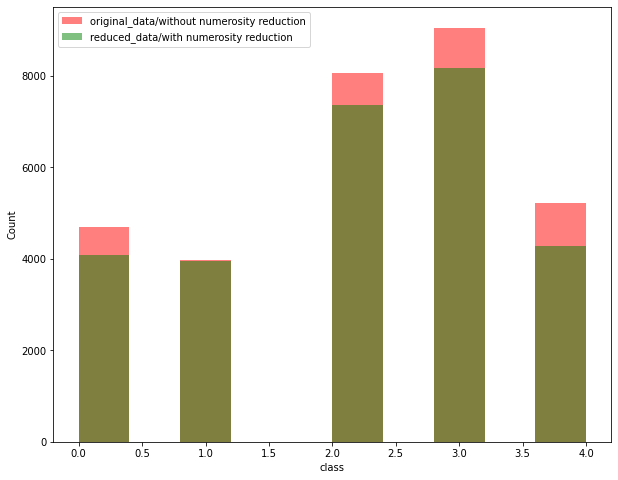

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(y_train, alpha = 0.5, color='r', label='original_data/without numerosity reduction')
plt.hist(y_modified_train_data_3, alpha = 0.5, color='g', label='reduced_data/with numerosity reduction')
plt.xlabel("class")
plt.ylabel("Count")
plt.legend(loc='upper left')
plt.show()

# consolidate

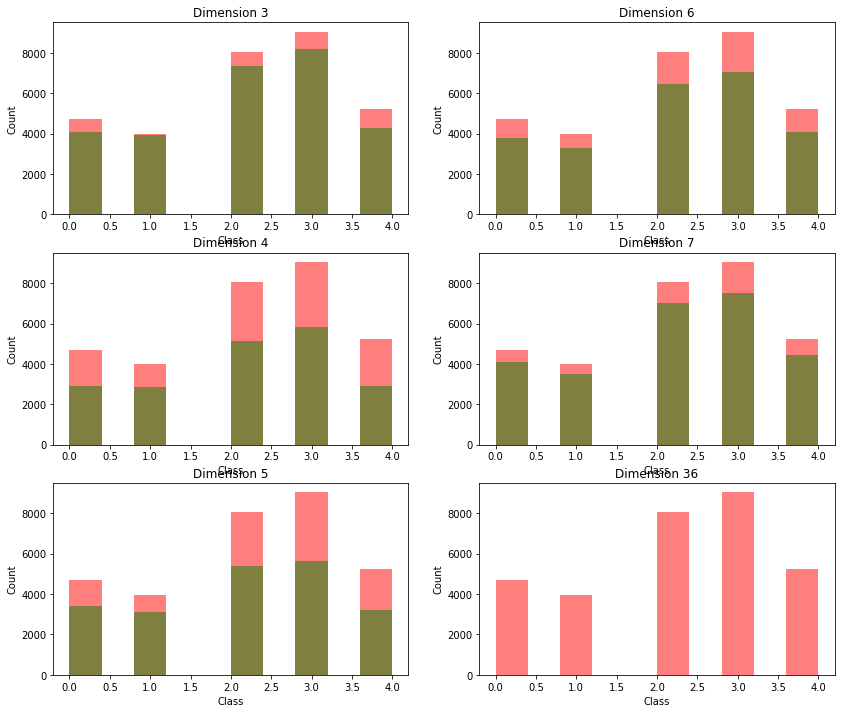

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(14,12))
axs[0, 0].hist(y_train, alpha = 0.5, color='r', label='original_data/without numerosity reduction')
axs[0, 0].hist(y_modified_train_data_3, alpha = 0.5, color='g', label='reduced_data/with numerosity reduction')
axs[0, 0].set_title("Dimension 3")
axs[0, 0].set_xlabel("Class")
axs[0, 0].set_ylabel("Count")

axs[1, 0].hist(y_train, alpha = 0.5, color='r', label='original_data/without numerosity reduction')
axs[1, 0].hist(y_modified_train_data_4, alpha = 0.5, color='g', label='reduced_data/with numerosity reduction')
axs[1, 0].set_title("Dimension 4")
axs[1, 0].set_xlabel("Class")
axs[1, 0].set_ylabel("Count")

axs[2, 0].hist(y_train, alpha = 0.5, color='r', label='original_data/without numerosity reduction')
axs[2, 0].hist(y_modified_train_data_5, alpha = 0.5, color='g', label='reduced_data/with numerosity reduction')
axs[2, 0].set_title("Dimension 5")
axs[2, 0].set_xlabel("Class")
axs[2, 0].set_ylabel("Count")

axs[0, 1].hist(y_train, alpha = 0.5, color='r', label='original_data/without numerosity reduction')
axs[0, 1].hist(y_modified_train_data_6, alpha = 0.5, color='g', label='reduced_data/with numerosity reduction')
axs[0, 1].set_title("Dimension 6")
axs[0, 1].set_xlabel("Class")
axs[0, 1].set_ylabel("Count")

axs[1, 1].hist(y_train, alpha = 0.5, color='r', label='original_data/without numerosity reduction')
axs[1, 1].hist(y_modified_train_data_7, alpha = 0.5, color='g', label='reduced_data/with numerosity reduction')
axs[1, 1].set_title("Dimension 7")
axs[1, 1].set_xlabel("Class")
axs[1, 1].set_ylabel("Count")

axs[2, 1].hist(y_train, alpha = 0.5, color='r', label='original_data/without numerosity reduction')
axs[2, 1].set_title("Dimension 36")
axs[2, 1].set_xlabel("Class")
axs[2, 1].set_ylabel("Count")
fig.savefig("Histo consolidate.jpg")

In [ ]:
results_metrics['reduced_count'] = [X_train.shape[0], X_train.shape[0], final_results_7['Reduce_data_size'][2], X_train.shape[0] , final_results_6['Reduce_data_size'][10], X_train.shape[0], final_results_5['Reduce_data_size'][2], X_train.shape[0], final_results_4['Reduce_data_size'][8], X_train.shape[0], final_results_3['Reduce_data_size'][10]]

In [ ]:
print_metric()

testing_accuracy
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247', '0.8791', '0.8674']


testing_precision
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247', '0.8791', '0.8674']


testing_recall
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247', '0.8791', '0.8674']


testing_F1_score
['0.9765', '0.9765', '0.9741', '0.9745', '0.9666', '0.9682', '0.9598', '0.9492', '0.9247', '0.8791', '0.8674']


testing_roc_auc_score
['0.9855', '0.9850', '0.9837', '0.9837', '0.9790', '0.9797', '0.9748', '0.9678', '0.9528', '0.9233', '0.9161']


dimension
['36', '7 without algo', '7 with algo', '6 without algo', '6 with algo', '5 without algo', '5 with algo', '4 without algo', '4 with algo', '3 without algo', '3 with algo']


% reduced
['0.0000', '0.0000', '14.3654', '0.0000', '20.4041', '0.0000', '32.9714', '0.0000', '36.7834', '0.0000', '10.0506']


reduced_count
['31033.0000', '3103

In [ ]:
pd.DataFrame(results_metrics).to_csv("results_metrics")

In [ ]:
results = pd.DataFrame(results_metrics)
results['dimension_multiplier'] = [36, 7, 7, 6, 6, 5, 5, 4, 4, 3, 3]
results

,testing_accuracy,testing_precision,testing_recall,testing_F1_score,testing_roc_auc_score,dimension,% reduced,reduced_count,dimension_multiplier
0,0.976543,0.976543,0.976543,0.976543,0.985457,36,0.000000,31033,36
1,0.976543,0.976543,0.976543,0.976543,0.984983,7 without algo,0.000000,31033,7
2,0.974095,0.974095,0.974095,0.974095,0.983672,7 with algo,14.365353,26575,7
3,0.974481,0.974481,0.974481,0.974481,0.983665,6 without algo,0.000000,31033,6
4,0.966619,0.966619,0.966619,0.966619,0.979046,6 with algo,20.404086,24701,6
5,0.968166,0.968166,0.968166,0.968166,0.979678,5 without algo,0.000000,31033,5
6,0.959789,0.959789,0.959789,0.959789,0.974771,5 with algo,32.971353,20801,5
7,0.949220,0.949220,0.949220,0.949220,0.967810,4 without algo,0.000000,31033,4
8,0.924733,0.924733,0.924733,0.924733,0.952844,4 with algo,36.783424,19618,4
9,0.879108,0.879108,0.879108,0.879108,0.923335,3 without algo,0.000000,31033,3


In [ ]:
results['Actual dimension shrink'] = (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)

In [ ]:
results

,testing_accuracy,testing_precision,testing_recall,testing_F1_score,testing_roc_auc_score,dimension,% reduced,reduced_count,dimension_multiplier,Actual dimension shrink
0,0.976543,0.976543,0.976543,0.976543,0.985457,36,0.000000,31033,36,100.000000
1,0.976543,0.976543,0.976543,0.976543,0.984983,7 without algo,0.000000,31033,7,19.444444
2,0.974095,0.974095,0.974095,0.974095,0.983672,7 with algo,14.365353,26575,7,16.651181
3,0.974481,0.974481,0.974481,0.974481,0.983665,6 without algo,0.000000,31033,6,16.666667
4,0.966619,0.966619,0.966619,0.966619,0.979046,6 with algo,20.404086,24701,6,13.265986
5,0.968166,0.968166,0.968166,0.968166,0.979678,5 without algo,0.000000,31033,5,13.888889
6,0.959789,0.959789,0.959789,0.959789,0.974771,5 with algo,32.971353,20801,5,9.309534
7,0.949220,0.949220,0.949220,0.949220,0.967810,4 without algo,0.000000,31033,4,11.111111
8,0.924733,0.924733,0.924733,0.924733,0.952844,4 with algo,36.783424,19618,4,7.024064
9,0.879108,0.879108,0.879108,0.879108,0.923335,3 without algo,0.000000,31033,3,8.333333


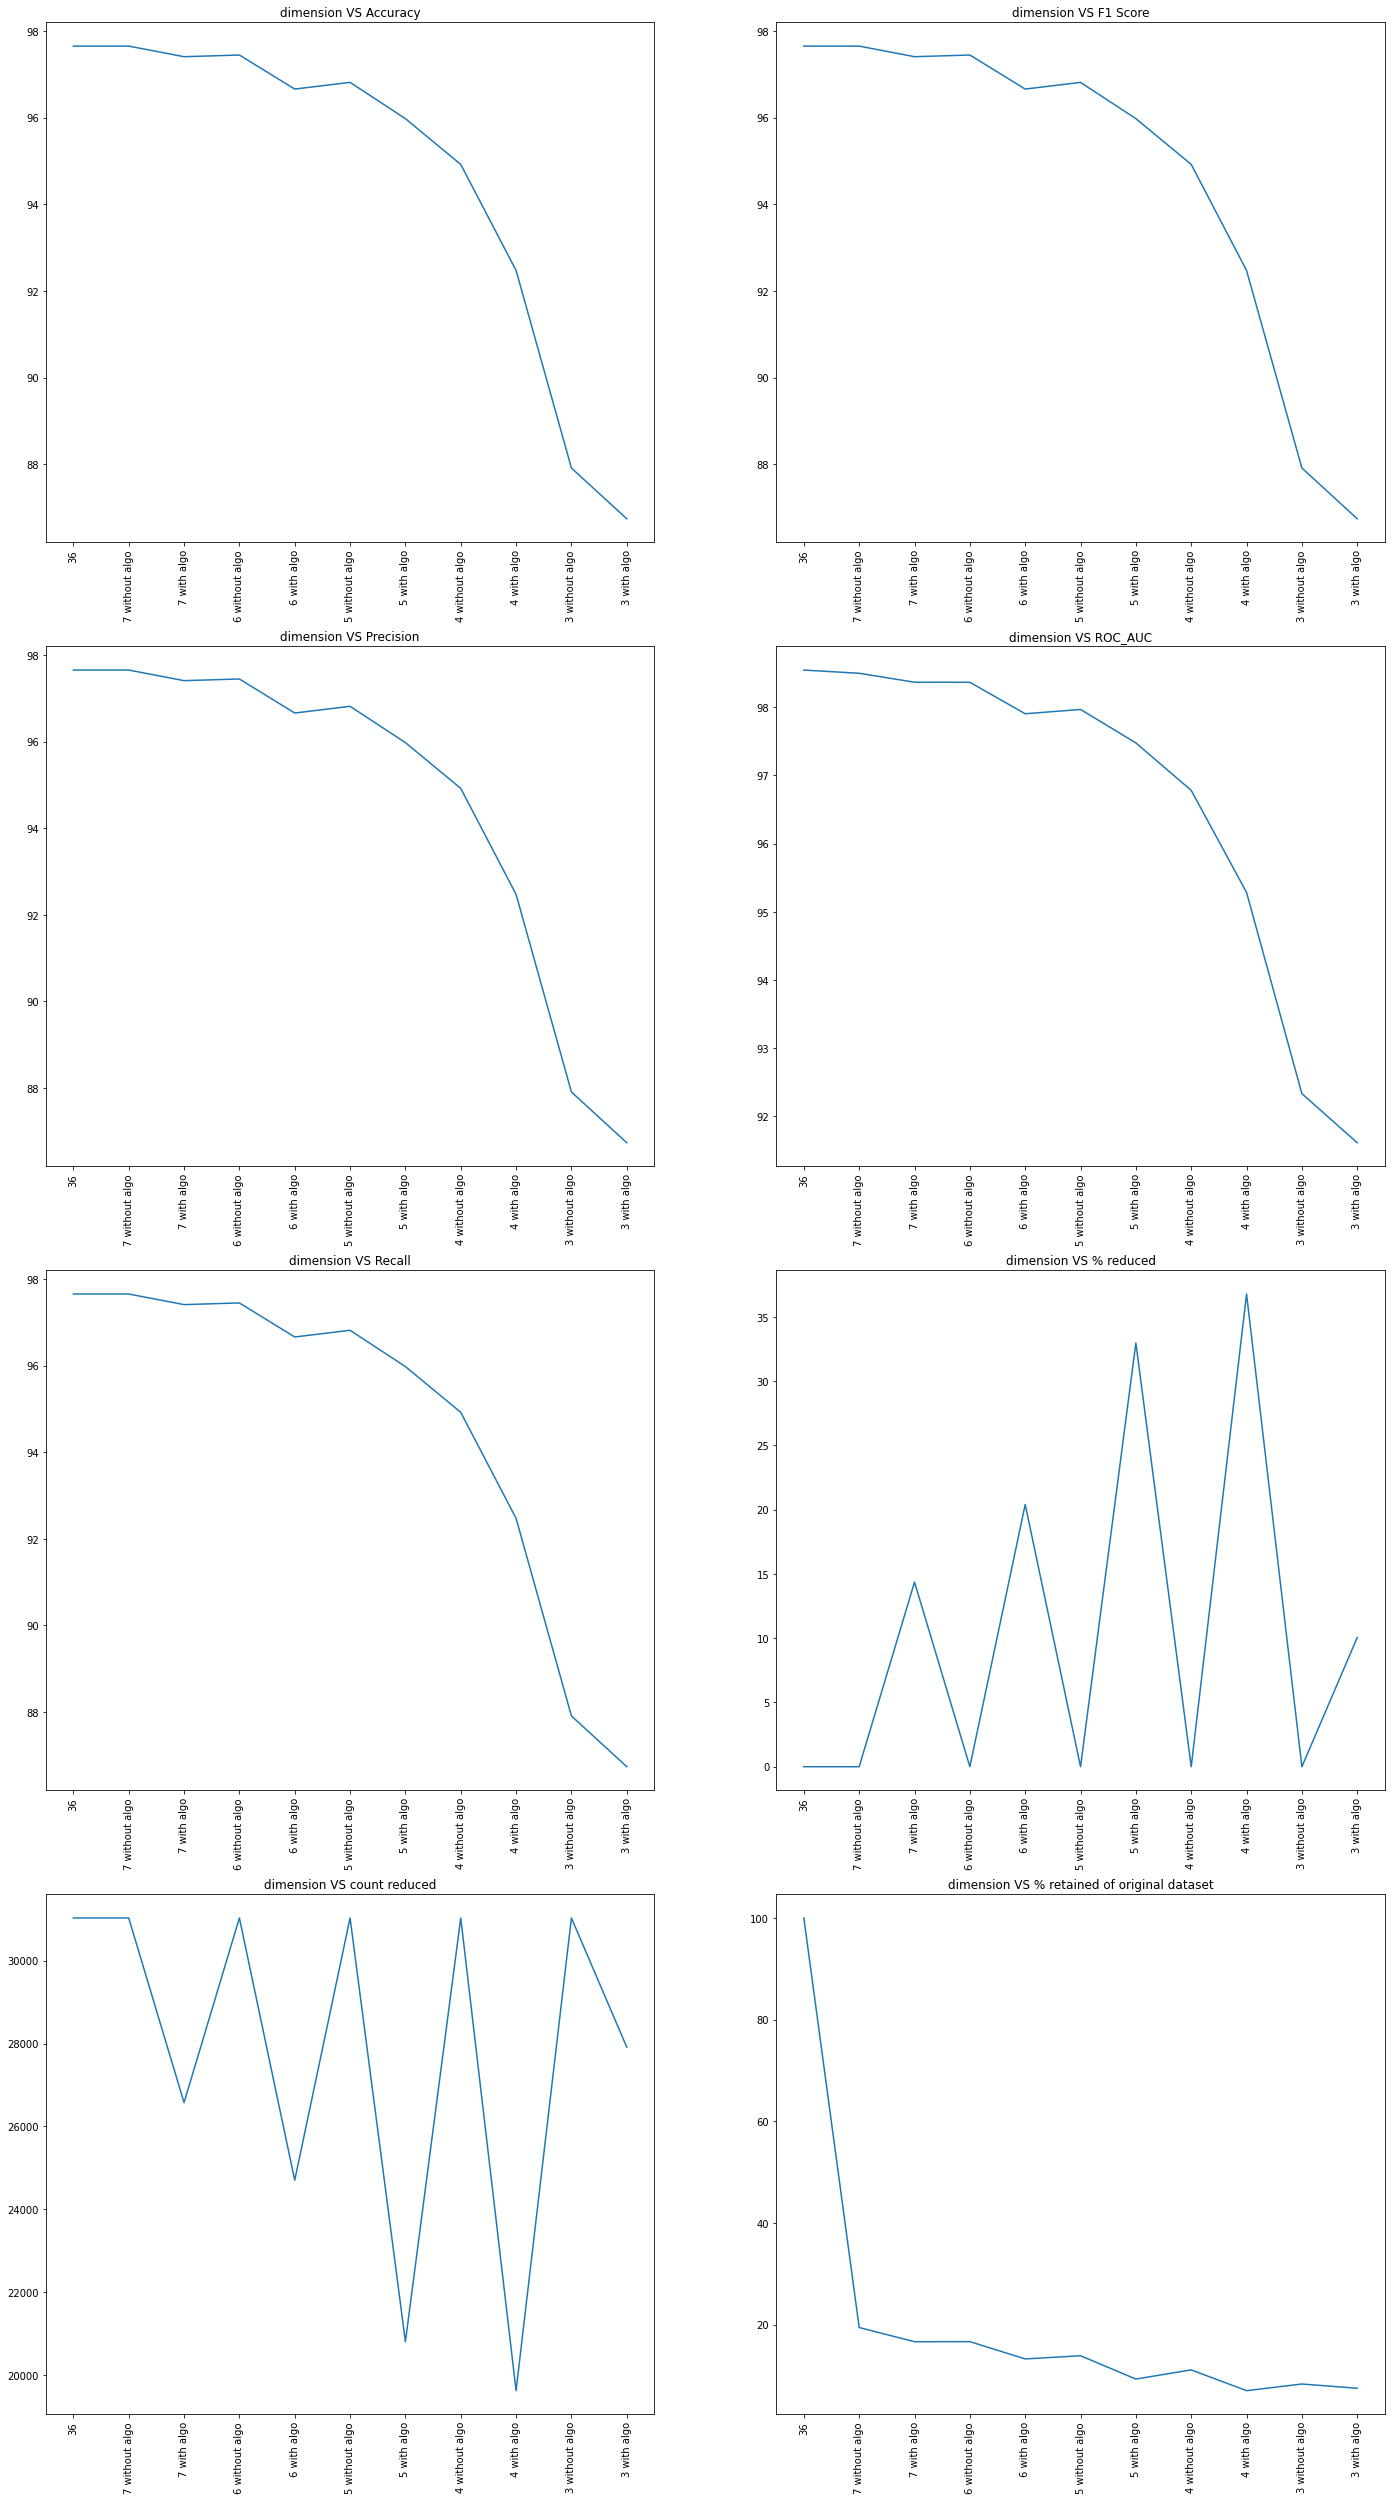

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(24,44))
axs[0, 0].plot(results['dimension'], results['testing_accuracy']*100)
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 0].set_title("dimension VS Accuracy")

axs[1, 0].plot(results['dimension'], results['testing_precision']*100)
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 0].set_title("dimension VS Precision")

axs[2, 0].plot(results['dimension'], results['testing_recall']*100)
axs[2, 0].tick_params(axis='x', rotation=90)
axs[2, 0].set_title("dimension VS Recall")

axs[0, 1].plot(results['dimension'], results['testing_F1_score']*100)
axs[0, 1].tick_params(axis='x', rotation=90)
axs[0, 1].set_title("dimension VS F1 Score")

axs[1, 1].plot(results['dimension'], results['testing_roc_auc_score']*100)
axs[1, 1].tick_params(axis='x', rotation=90)
axs[1, 1].set_title("dimension VS ROC_AUC")

axs[2, 1].plot(results['dimension'], results['% reduced'])
axs[2, 1].tick_params(axis='x', rotation=90)
axs[2, 1].set_title("dimension VS % reduced")

axs[3, 0].plot(results['dimension'], results['reduced_count'])
axs[3, 0].tick_params(axis='x', rotation=90)
axs[3, 0].set_title("dimension VS count reduced")

axs[3, 1].plot(results['dimension'], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100))
axs[3, 1].tick_params(axis='x', rotation=90)
axs[3, 1].set_title("dimension VS % retained of original dataset")
fig.savefig("final results.jpg")

In [ ]:
#ECR_DBSCAN algo

In [ ]:
data_scaled6.shape

(31033, 6)

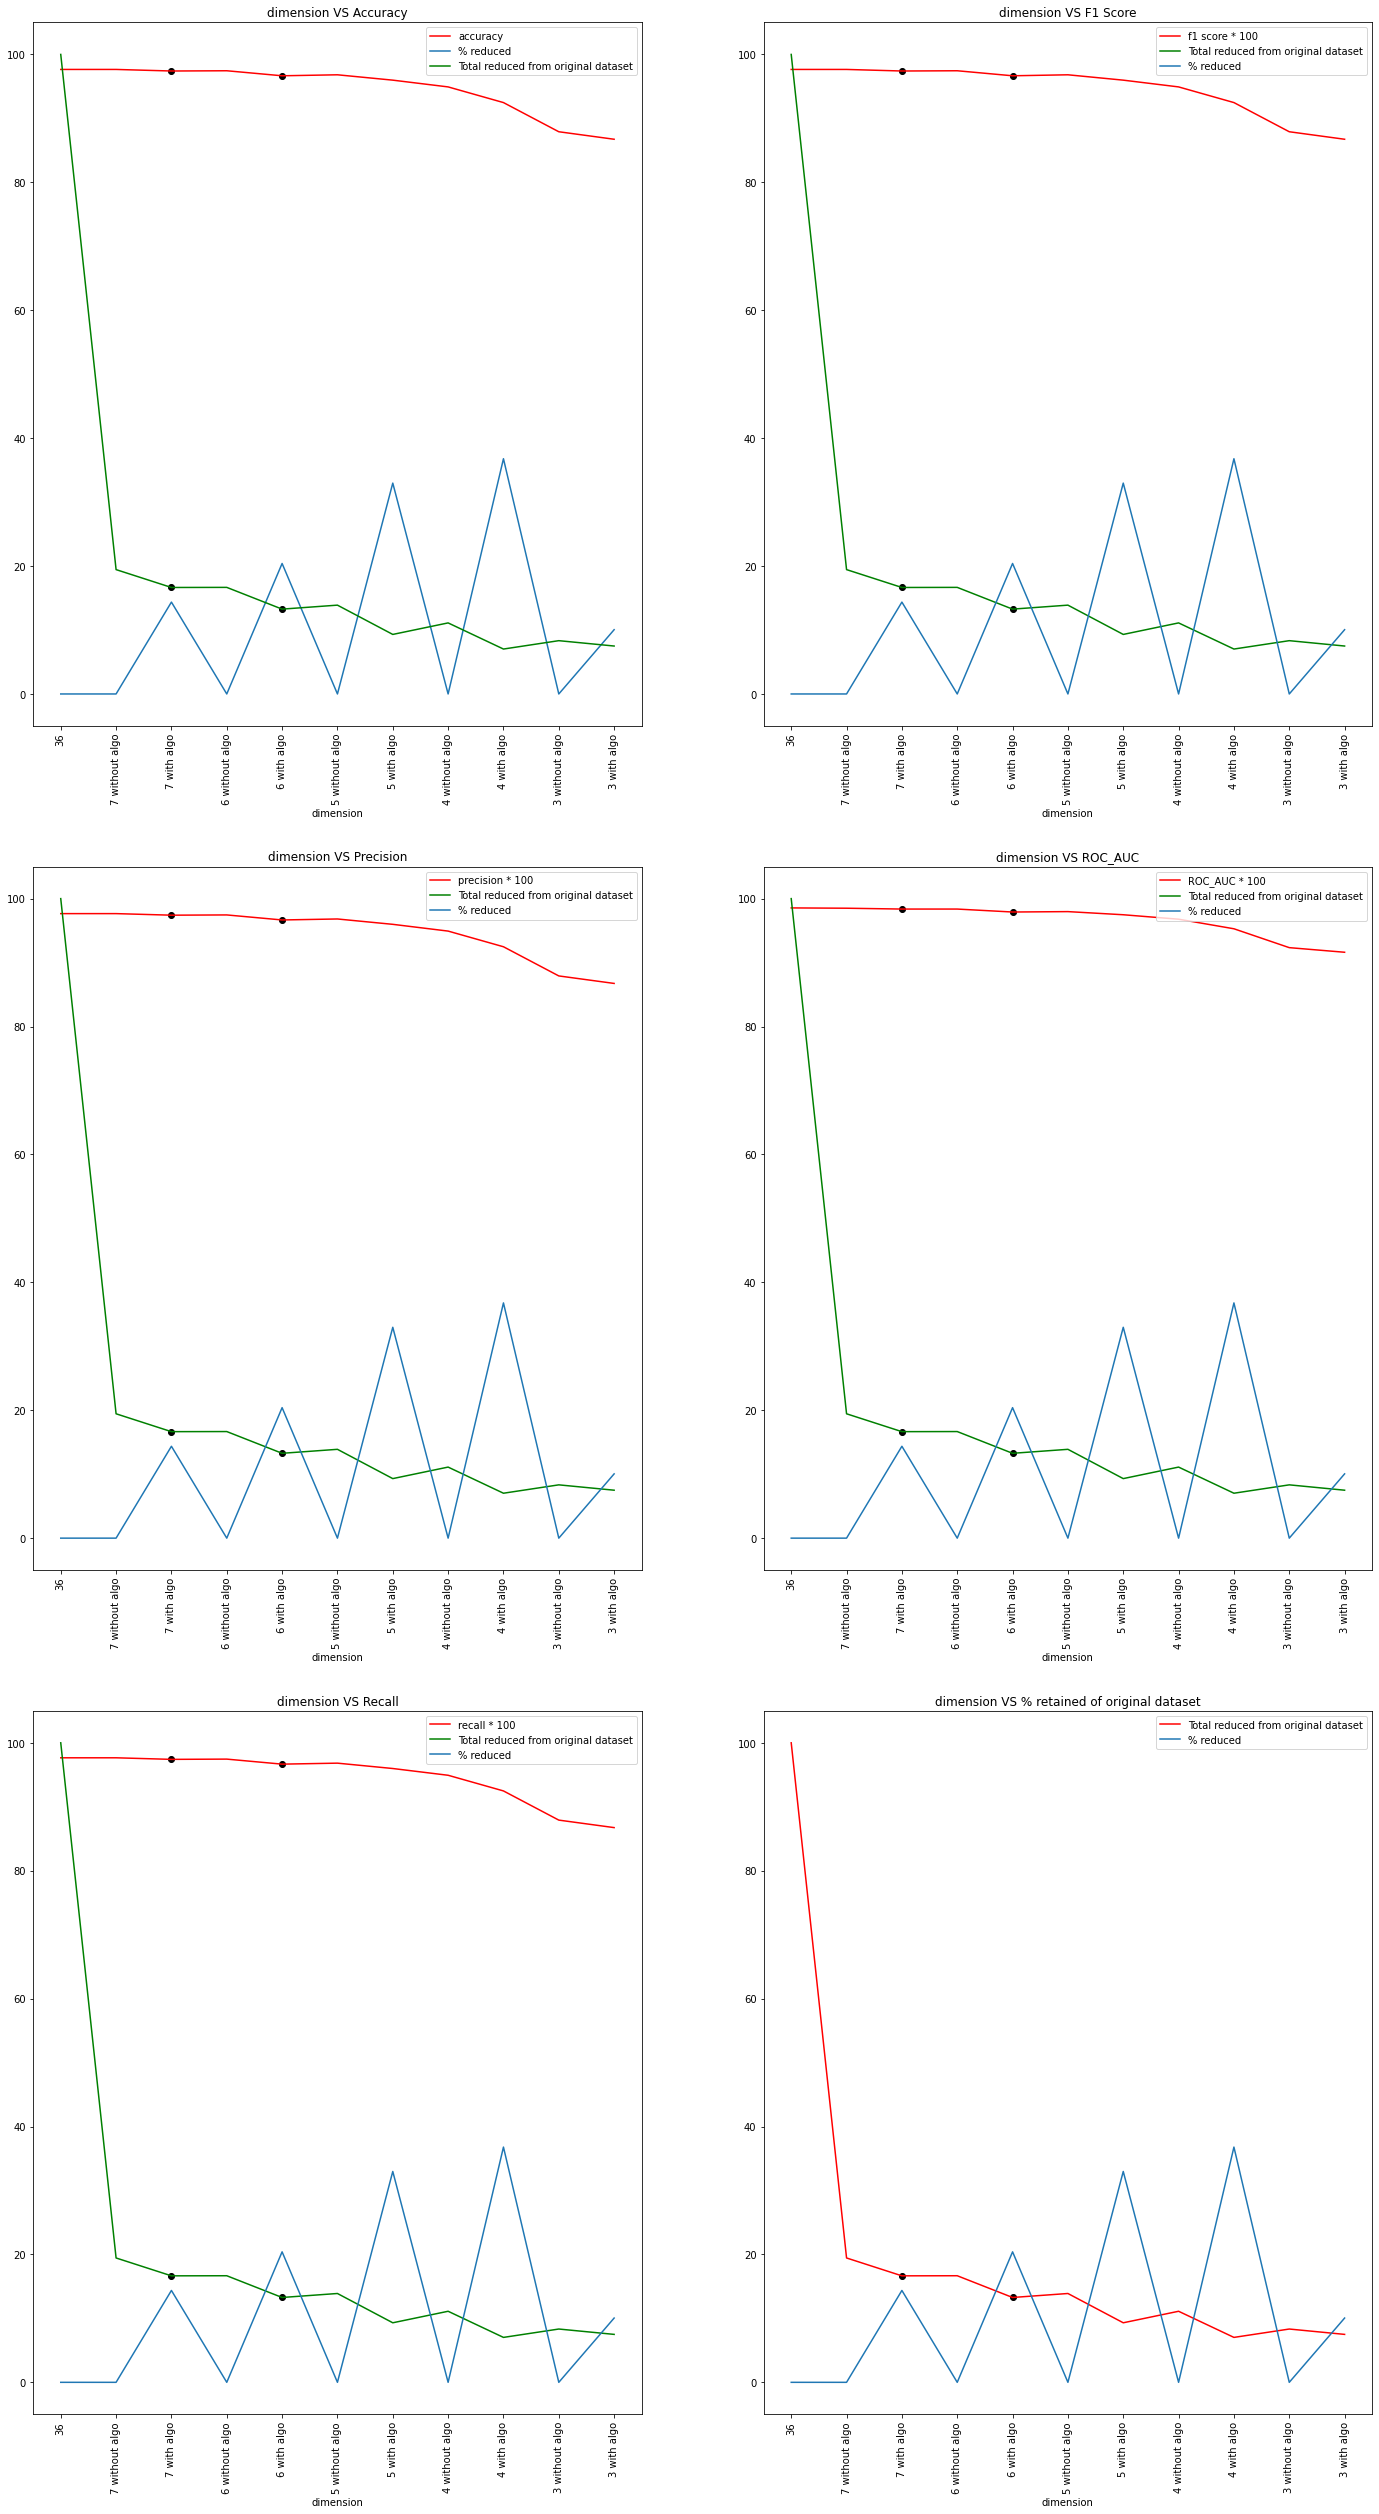

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(24,44))
axs[0, 0].plot(results['dimension'], results['testing_accuracy']*100, color = 'r', label="accuracy")
axs[0, 0].plot(results['dimension'], results['% reduced'],label="% reduced")
axs[0, 0].scatter(results['dimension'][2], results['testing_accuracy'][2]*100, color="black")
axs[0, 0].scatter(results['dimension'][4], results['testing_accuracy'][4]*100, color="black")
axs[0, 0].plot(results['dimension'], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100), color = 'green', label = "Total reduced from original dataset")
axs[0, 0].scatter(results['dimension'][2], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)[2],color = 'black')
axs[0, 0].scatter(results['dimension'][4], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)[4],color = 'black')
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 0].set_title("dimension VS Accuracy")
axs[0, 0].legend(loc='upper right')
axs[0, 0].set_xlabel("dimension")

axs[1, 0].plot(results['dimension'], results['testing_precision']*100, color = 'r',label="precision * 100")
axs[1, 0].scatter(results['dimension'][2], results['testing_precision'][2] * 100, color = 'black')
axs[1, 0].scatter(results['dimension'][4], results['testing_precision'][4] * 100, color = 'black')
axs[1, 0].plot(results['dimension'], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100), color = 'green', label = "Total reduced from original dataset")
axs[1, 0].scatter(results['dimension'][2], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)[2],color = 'black')
axs[1, 0].scatter(results['dimension'][4], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)[4],color = 'black')
axs[1, 0].plot(results['dimension'], results['% reduced'], label="% reduced")
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 0].set_title("dimension VS Precision")
axs[1, 0].legend(loc='upper right')
axs[1, 0].set_xlabel("dimension")

axs[2, 0].plot(results['dimension'], results['testing_recall']*100, color = 'r', label="recall * 100")
axs[2, 0].scatter(results['dimension'][2], results['testing_recall'][2]*100, color = 'black')
axs[2, 0].scatter(results['dimension'][4], results['testing_recall'][4]*100, color = 'black')
axs[2, 0].plot(results['dimension'], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100), color = 'green', label = "Total reduced from original dataset")
axs[2, 0].scatter(results['dimension'][2], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)[2],color = 'black')
axs[2, 0].scatter(results['dimension'][4], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)[4],color = 'black')
axs[2, 0].plot(results['dimension'], results['% reduced'], label="% reduced")
axs[2, 0].tick_params(axis='x', rotation=90)
axs[2, 0].set_title("dimension VS Recall")
axs[2, 0].legend(loc='upper right')
axs[2, 0].set_xlabel("dimension")

axs[0, 1].plot(results['dimension'], results['testing_F1_score']*100, color = 'r', label="f1 score * 100")
axs[0, 1].plot(results['dimension'], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100), color = 'green', label = "Total reduced from original dataset")
axs[0, 1].scatter(results['dimension'][2], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)[2],color = 'black')
axs[0, 1].scatter(results['dimension'][4], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)[4],color = 'black')
axs[0, 1].scatter(results['dimension'][2], results['testing_F1_score'][2]*100, color = 'black')
axs[0, 1].scatter(results['dimension'][4], results['testing_F1_score'][4]*100, color = 'black')
axs[0, 1].plot(results['dimension'], results['% reduced'], label="% reduced")
axs[0, 1].tick_params(axis='x', rotation=90)
axs[0, 1].set_title("dimension VS F1 Score")
axs[0, 1].legend(loc='upper right')
axs[0, 1].set_xlabel("dimension")

axs[1, 1].plot(results['dimension'], results['testing_roc_auc_score']*100, color = 'r', label="ROC_AUC * 100")
axs[1, 1].plot(results['dimension'], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100), color = 'green', label = "Total reduced from original dataset")
axs[1, 1].scatter(results['dimension'][2], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)[2],color = 'black')
axs[1, 1].scatter(results['dimension'][4], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)[4],color = 'black')
axs[1, 1].scatter(results['dimension'][2], results['testing_roc_auc_score'][2]*100, color = 'black')
axs[1, 1].scatter(results['dimension'][4], results['testing_roc_auc_score'][4]*100, color = 'black')
axs[1, 1].plot(results['dimension'], results['% reduced'], label="% reduced")
axs[1, 1].tick_params(axis='x', rotation=90)
axs[1, 1].set_title("dimension VS ROC_AUC")
axs[1, 1].legend(loc='upper right')
axs[1, 1].set_xlabel("dimension")

axs[2, 1].plot(results['dimension'], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100), color = 'r', label = "Total reduced from original dataset")
axs[2, 1].scatter(results['dimension'][2], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)[2], color = 'black')
axs[2, 1].scatter(results['dimension'][4], (( (results['reduced_count'] * results['dimension_multiplier']) / (X_train.shape[0] * 36) )*100)[4], color = 'black')
axs[2, 1].plot(results['dimension'], results['% reduced'], label="% reduced")
axs[2, 1].tick_params(axis='x', rotation=90)
axs[2, 1].set_title("dimension VS % retained of original dataset")
axs[2, 1].legend(loc='upper right')
axs[2, 1].set_xlabel("dimension")

fig.savefig("output.jpg")

In [ ]:
"""
vor = Voronoi(data_scaled6)
vor_points = vor.vertices
hull = ConvexHull(data_scaled6)
hull_points = data_scaled6[hull.vertices]
ncol = data_scaled6.shape[1]
vor_points = np.array(vor_points)
hull_points = np.array(hull_points)
"""

'\nvor = Voronoi(data_scaled6)\nvor_points = vor.vertices\nhull = ConvexHull(data_scaled6)\nhull_points = data_scaled6[hull.vertices]\nncol = data_scaled6.shape[1]\nvor_points = np.array(vor_points)\nhull_points = np.array(hull_points)\n'

In [ ]:
"""
inside_vor_vertices = []
convex_hull_points = hull_points
for ij in range(len(vor_points)): #len(vor_points)
    x = (np.append(data_scaled6, vor_points[ij]))
    x = np.array(np.reshape(np.array([x]), (-1, ncol)))
    new_convex_hull = ConvexHull(x)
    new_hull_points = np.array(x[new_convex_hull.vertices])
    old_hull_points = hull_points
    
    if np.array_equal(old_hull_points, new_hull_points):
        #print("point_inserted")
        inside_vor_vertices.append(vor_points[ij])
"""

'\ninside_vor_vertices = []\nconvex_hull_points = hull_points\nfor ij in range(len(vor_points)): #len(vor_points)\n    x = (np.append(data_scaled6, vor_points[ij]))\n    x = np.array(np.reshape(np.array([x]), (-1, ncol)))\n    new_convex_hull = ConvexHull(x)\n    new_hull_points = np.array(x[new_convex_hull.vertices])\n    old_hull_points = hull_points\n    \n    if np.array_equal(old_hull_points, new_hull_points):\n        #print("point_inserted")\n        inside_vor_vertices.append(vor_points[ij])\n'

In [ ]:
"""
print(len(inside_vor_vertices))
inside_vor_vertices = np.array(inside_vor_vertices)
print(inside_vor_vertices.shape)
"""

'\nprint(len(inside_vor_vertices))\ninside_vor_vertices = np.array(inside_vor_vertices)\nprint(inside_vor_vertices.shape)\n'

In [ ]:
"""
rad_dist=(distance.cdist(inside_vor_vertices,trim_data,metric='euclidean'))
radlist=[]
for i in range(len(rad_dist)):
    radlist.append(min(rad_dist[i]))
"""

"\nrad_dist=(distance.cdist(inside_vor_vertices,trim_data,metric='euclidean'))\nradlist=[]\nfor i in range(len(rad_dist)):\n    radlist.append(min(rad_dist[i]))\n"

In [ ]:
"""
radlist = np.array(radlist)
radlist.sort()
print(radlist.shape)
x = range(len(radlist))
knc = KneeLocator(x, radlist, curve='convex', direction='increasing')
epsilon = radlist[knc.knee]
print("ECs :",knc.knee," ", epsilon)
"""

'\nradlist = np.array(radlist)\nradlist.sort()\nprint(radlist.shape)\nx = range(len(radlist))\nknc = KneeLocator(x, radlist, curve=\'convex\', direction=\'increasing\')\nepsilon = radlist[knc.knee]\nprint("ECs :",knc.knee," ", epsilon)\n'

In [ ]:
#plot histogram for all the the dimension
#add the final number of the reduced data set as well
